<a href="https://colab.research.google.com/github/leospace23/Trabalho-de-Classifica-de-texto/blob/main/Trabalho_de_minera%C3%A7%C3%A3o_e_classifica%C3%A7%C3%A3o_de_texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Validação Cruzada Estratificada:

  É utilizada quando se tem um conjunto de dados desbalanceado, ou seja, quando uma classe é representada por um número muito menor de observações do que as outras.

In [53]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#Carregamento dos dados

Vamos carregar os dados dos textos das notícias. Essas notícias são referentes ao ano de 2017 e estão distribuídas dentre 6 categorias diferentes, conforme consta na análise preliminar a seguir.

In [54]:
import pandas as pd


data_content = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/apps_reviews_validacao.csv', sep=',')
data_content

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,O app da Shopee é razoável. Apesar de ser fáci...,positive,sadness,NaN
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,"O app é bem otimizado, fácil de visualizar os ...",positive,sadness,NaN
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,"O app é muito bom, prático e fácil de entender...",positive,sadness,NaN
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,Aplicativo muito bom. Mas algo que me chateou ...,positive,sadness,NaN
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,"o app é muito bom, porém tenho tido dificuldad...",negative,disgust,NaN
...,...,...,...,...,...,...
3006,0d6b3412-9b1a-4969-9e60-0b2753a7eb16,gov.br,Não funciona!! Reconhimento facial diz que nen...,negative,disgust,NaN
3007,e3e70dcc-0199-4c29-86c4-0b2938e0d8b7,gov.br,A experiência com o App não está sendo boa. El...,negative,disgust,NaN
3008,5fb22c33-c93c-43fe-97a5-802183648acb,gov.br,"Não consigo logar de jeito nenhum, o código de...",negative,disgust,NaN
3009,4772c4b6-5f0d-493f-b894-79b6e2abec32,gov.br,Funcionava até ultima atualização. Por algum m...,negative,disgust,NaN


In [55]:
data_content.describe()

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
count,3011,3011,3011,3011,3011,1
unique,3011,10,3011,3,7,1
top,b2ca0eda-2492-411f-b5be-e81071f52122,Shopee,O reconhecimento facial simplesmente não funci...,negative,disgust,X
freq,1,303,1,1742,952,1


In [56]:
data_content.describe()

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5
count,3011,3011,3011,3011,3011,1
unique,3011,10,3011,3,7,1
top,b2ca0eda-2492-411f-b5be-e81071f52122,Shopee,O reconhecimento facial simplesmente não funci...,negative,disgust,X
freq,1,303,1,1742,952,1


In [57]:
data_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   reviewId            3011 non-null   object
 1   app_name            3011 non-null   object
 2   content             3011 non-null   object
 3   sentiment_polarity  3011 non-null   object
 4   sentiment           3011 non-null   object
 5   Unnamed: 5          1 non-null      object
dtypes: object(6)
memory usage: 141.3+ KB


In [58]:
train_data = pd.DataFrame(data_content)
train_data.to_csv('/content/drive/MyDrive/Colab Notebooks/train_data.csv', index=False)


#Pré-processamento

Remoção dos caracteres que não são latinos

In [59]:
import regex

train_data['content'] = train_data['content'].apply(lambda x: regex.sub('[^\p{Latin}]', u' ', str(x)))
train_data .loc[0, 'content']

'O app da Shopee é razoável  Apesar de ser fácil de utilizar  apresenta alguns bugs  Por exemplo  Sugestão de palavra errada no campo de pesquisa que acarreta na busca errada  Sugestões de produtos que não têm nada a ver com coisas de nosso interesse  Dificuldade de acesso de alguns jogos ou travamento durante alguma jogada  Falhas para carregar certos anexos para avaliação dos produtos  No geral  são problemas que se pode contornar  pois não ocorrem com tanta frequência '

Colocando todos os textos para minúsculo

In [60]:
train_data['content'] = train_data['content'].apply(lambda x: str(x).lower())
train_data .loc[0, 'content']

'o app da shopee é razoável  apesar de ser fácil de utilizar  apresenta alguns bugs  por exemplo  sugestão de palavra errada no campo de pesquisa que acarreta na busca errada  sugestões de produtos que não têm nada a ver com coisas de nosso interesse  dificuldade de acesso de alguns jogos ou travamento durante alguma jogada  falhas para carregar certos anexos para avaliação dos produtos  no geral  são problemas que se pode contornar  pois não ocorrem com tanta frequência '

Função para remover stopwords mais facilmente no datafreme

In [61]:
def remove_stopwords(texto):
    stops_list = stopwords.words("portuguese")
    word_tokens = word_tokenize(texto)
    texto_sem_stops = [w for w in word_tokens if w not in stops_list]
    return " ".join(texto_sem_stops)

Vamos remover stopwords usando a função definida acima

In [62]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

train_data['content'] = train_data['content'].apply(remove_stopwords)
train_data.loc[0, 'content']

'app shopee razoável apesar fácil utilizar apresenta alguns bugs exemplo sugestão palavra errada campo pesquisa acarreta busca errada sugestões produtos têm nada ver coisas interesse dificuldade acesso alguns jogos travamento durante alguma jogada falhas carregar certos anexos avaliação produtos geral problemas pode contornar pois ocorrem tanta frequência'

#Análise das Categorias

In [64]:
train_data['sentiment'].value_counts()

,count
sentiment,
disgust,952
sadness,864
anger,743
happiness,319
neutral,82
fear,47
surprise,4


In [65]:
train_data['sentiment_polarity'].value_counts()

,count
sentiment_polarity,
negative,1742
positive,1187
neutral,82


#Lemetização
A lematização é o processo de reduzir palavras à sua forma base ou raiz, levando em consideração o contexto gramatical.

Utilização da biblioteca spacy e carregamento do modelo de linguagem em português (pt_core_news_sm), pois este modelo é usado para processar o texto, incluindo tarefas como lematização, análise gramatical e extração de entidades.

In [66]:
!python -m spacy download pt_core_news_sm
import spacy

nlp = spacy.load('pt_core_news_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 64.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Função de processamento e criação de objeto que contém informações linguśticas sobre o texto que será fornecido, no caso train_lemmatizer['content'], transformando em uma lista de substantivos para posterior tokenização.

In [67]:
def lemmatize_text(text):
    doc = nlp(text)
    # Obter lemas de tokens que são substantivos
    return [token.lemma_ for token in doc if token.pos_ == 'NOUN']

Criação da lista de substantivos

In [68]:
train_lemmatizer = train_data.copy()
train_lemmatizer['spacy_lemma'] = train_data['content'].apply(lemmatize_text)
train_lemmatizer.to_csv('/content/drive/MyDrive/Colab Notebooks/lemmatizer.csv', index=False)

Conversão da lista anterior em strings

In [69]:
train_lemmatizer.loc[0,'content']

'app shopee razoável apesar fácil utilizar apresenta alguns bugs exemplo sugestão palavra errada campo pesquisa acarreta busca errada sugestões produtos têm nada ver coisas interesse dificuldade acesso alguns jogos travamento durante alguma jogada falhas carregar certos anexos avaliação produtos geral problemas pode contornar pois ocorrem tanta frequência'

In [70]:
train_lemmatizer.loc[0,'spacy_lemma']

['app',
 'exemplo',
 'sugestão',
 'palavra',
 'pesquisa',
 'busca',
 'sugestão',
 'produto',
 'coisa',
 'dificuldade',
 'acesso',
 'jogo',
 'jogada',
 'avaliação',
 'produto',
 'problema',
 'frequência']

Converte cada lista de lemas em uma string única, onde os lemas são separados por espaços.

In [71]:
train_lemmatizer['spacy_lemma'] = train_lemmatizer['spacy_lemma'].apply(lambda x: ' '.join(x))
train_lemmatizer.head()

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5,spacy_lemma
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shopee razoável apesar fácil utilizar apre...,positive,sadness,NaN,app exemplo sugestão palavra pesquisa busca su...
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimizado fácil visualizar produtos pe...,positive,sadness,NaN,produto acho recomendação produto produto brin...
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prático fácil entender porém alguns ve...,positive,sadness,NaN,app prático vendedor produto anúncio diferença...
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo bom algo chateou bastante fato pesq...,positive,sadness,NaN,fato produto cep frete frete produto valor car...
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tido dificuldades pagamento cart...,negative,disgust,NaN,app dificuldade pagamento crédito compra pagam...


#Extração da features (representação de texto em formato vetorial)
A seguir, faremos a instanciação do método que fará a representação do texto usando o modelo Bag of Words visto em aula.

#1.   BoW + NaiveBayes




O CountVectorizer é uma ferramenta da biblioteca scikit-learn que transforma uma coleção de documentos de texto em uma matriz de contagem de palavras. Nessa matriz, cada documento é representado por um vetor, onde cada elemento indica o número de ocorrências de uma palavra (ou token) específica no documento.

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

O método fit_transform do CountVectorizer ajusta o vetor de contagem aos dados textuais na coluna content do DataFrame data_content e converte esses dados em uma matriz esparsa de contagem de palavras. Nessa matriz, cada linha corresponde a um documento, enquanto cada coluna representa uma palavra do vocabulário.

In [73]:
BoW_matriz = vectorizer.fit_transform(train_lemmatizer['spacy_lemma'])

In [74]:
BOW_dataframe=pd.DataFrame(BoW_matriz.toarray(),columns=vectorizer.get_feature_names_out())
BOW_dataframe

,aap,aba,abaixe,abaixem,abandonei,abate,abençoe,aberração,abertura,aberturar,...,época,ícone,íntegra,óculos,ódio,óptimo,órgão,ótimas,ótimo,ônibus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Treinamento e teste

Aqui vamos estimar a performance do classificador utilizando uma subdivisão nos dados. Vamos dividir os dados (BOW_dataframe) em um conjunto de teste e outro treinamento.

In [75]:
textos_bow = BOW_dataframe
categorias1 = train_data['sentiment'] # as categorias devem estar separadas dos dados de treinamento
categorias2 = train_data['sentiment_polarity']

O código abaixo realiza validação cruzada estratificada para um classificador usando o número especificado de folds. Ele calcula e exibe várias métricas de desempenho, incluindo acurácia, precisão, recall, e F1-Score, além de exibir a matriz de confusão para cada fold.

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt

def cross_validate_model(X, y,classifier, n_splits):
    """
    Realiza a validação cruzada estratificada para cada classificador desejado usando o número especificado de folds.

    Parâmetros:
    X (pd.DataFrame): Dados de entrada (features).
    y (pd.Series): Rótulos de saída (target).
    n_splits (int): Número de folds para validação cruzada.

    Retorna:
    dict: Dicionário contendo a média de acurácia e os relatórios de classificação para cada fold.
    """
    # Listas para armazenar os resultados
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    fscore_scores = []
    support_scores = []
    all_y_true = []
    all_y_pred = []
    classification_reports = []


     # Instanciar o StratifiedKFold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Contador para os folds
    fold_number = 1

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        # Calcular métricas de desempenho
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)
        report = classification_report(y_test, y_pred, zero_division=1)

        # Armazenar os resultados
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        fscore_scores.append(fscore)
        classification_reports.append(report)

        # Exibir resultados para o fold atual
        print(f'\nFold {fold_number} - Accuracy: {accuracy:.4f}')
        print(f'Fold {fold_number} - Precision: {precision:.4f}')
        print(f'Fold {fold_number} - Recall: {recall:.4f}')
        print(f'Fold {fold_number} - F1-Score: {fscore:.4f}')

        # Calcular e exibir a matriz de confusão para o fold atual
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False,
                    xticklabels=y.unique(), yticklabels=y.unique())
        plt.xlabel("Classe real")
        plt.ylabel("Classe predita")
        plt.title(f'Matriz de Confusão - Fold {fold_number}')
        plt.show()

        # Incrementar o número do fold
        fold_number += 1

    # Calcular e exibir médias de desempenho
    mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    mean_precision = sum(precision_scores) / len(precision_scores)
    mean_recall = sum(recall_scores) / len(recall_scores)
    mean_fscore = sum(fscore_scores) / len(fscore_scores)

    print(f'\nMédia de Acurácia: {mean_accuracy:.4f}')
    print(f'Média de Precision: {mean_precision:.4f}')
    print(f'Média de Recall: {mean_recall:.4f}')
    print(f'Média de F1-Score: {mean_fscore:.4f}')

    return {
        'accuracy_scores': accuracy_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'f1_scores': fscore_scores
    }


Em validação cruzada, folds são subconjuntos nos quais o conjunto de dados é dividido para avaliar o desempenho de um modelo. A técnica de validação cruzada envolve dividir os dados em várias partes (folds), treinar o modelo em alguns desses folds e testar o modelo em outros folds. O objetivo é garantir que o modelo seja avaliado de maneira robusta e que não seja sobreajustado a um subconjunto específico dos dados.

 Um número menor de folds (como 4) pode ser mais apropriado, pois garante que cada fold tenha uma quantidade razoável de dados para treinamento e teste.O número de folds é um compromisso comum entre a quantidade de treinamento e a eficiência computacional. Oferece uma boa estimativa de desempenho sem ser excessivamente caro em termos de computação.

 O conjunto de dados será separado em 4 partes iguais, ou seja 602 amostras, e para cada conjunto de amostras um deles é reservado para teste e os outros 43 para treinar o modelo. O modelo será treinado com os dados de treinamento e avaliado com os dados de teste, esse processo se repete 4 vezes e cada vez utilizando um fold diferente como teste.


Fold 1 - Accuracy: 0.5020
Fold 1 - Precision: 0.5334
Fold 1 - Recall: 0.5020
Fold 1 - F1-Score: 0.4816


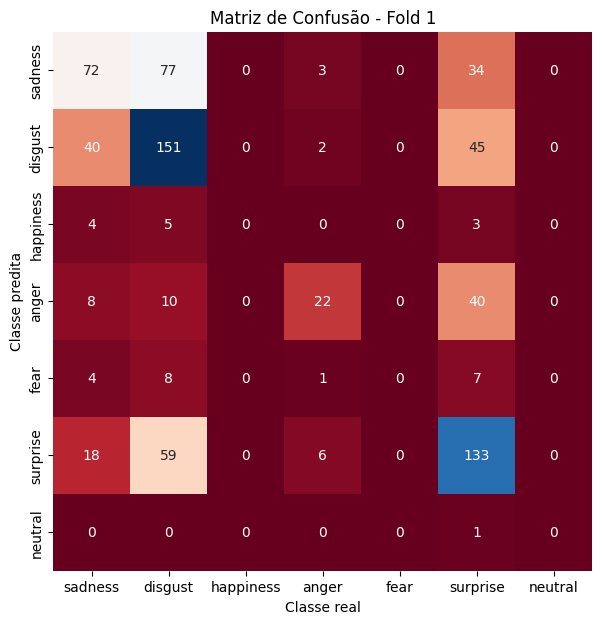


Fold 2 - Accuracy: 0.4754
Fold 2 - Precision: 0.5221
Fold 2 - Recall: 0.4754
Fold 2 - F1-Score: 0.4537


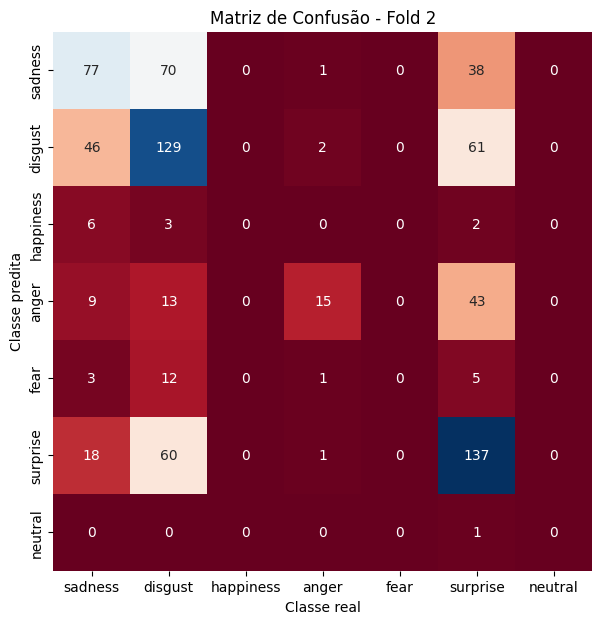


Fold 3 - Accuracy: 0.4993
Fold 3 - Precision: 0.5165
Fold 3 - Recall: 0.4993
Fold 3 - F1-Score: 0.4768


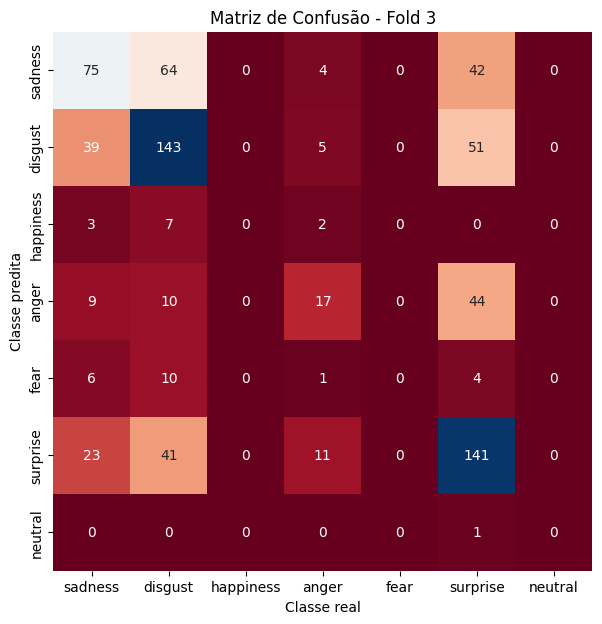


Fold 4 - Accuracy: 0.4681
Fold 4 - Precision: 0.5061
Fold 4 - Recall: 0.4681
Fold 4 - F1-Score: 0.4475


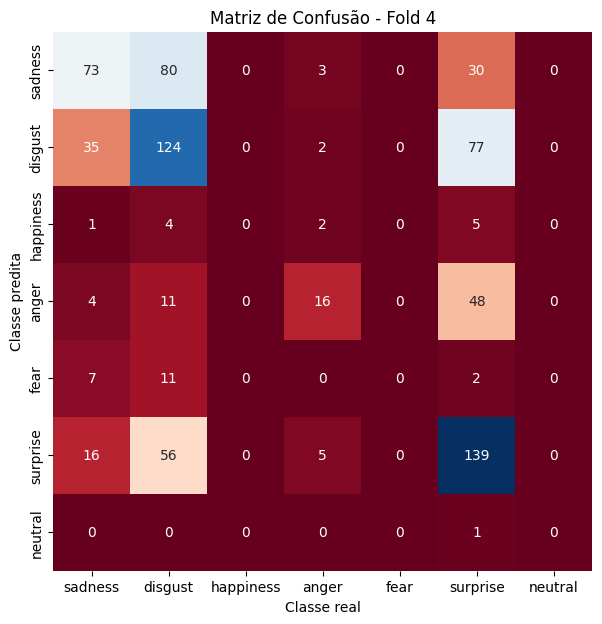


Média de Acurácia: 0.4862
Média de Precision: 0.5195
Média de Recall: 0.4862
Média de F1-Score: 0.4649




,accuracy_scores,precision_scores,recall_scores,f1_scores
0,0.501992,0.533402,0.501992,0.481623
1,0.475432,0.522124,0.475432,0.453716
2,0.499336,0.516460,0.499336,0.476811
3,0.468085,0.506100,0.468085,0.447507


In [77]:
from sklearn.naive_bayes import MultinomialNB

classifierNB = MultinomialNB()
BowNB = cross_validate_model(textos_bow, categorias1, classifierNB, 4)

results_bownb = pd.DataFrame(BowNB)
print("\n")
results_bownb


Fold 1 - Accuracy: 0.7065
Fold 1 - Precision: 0.7126
Fold 1 - Recall: 0.7065
Fold 1 - F1-Score: 0.6947


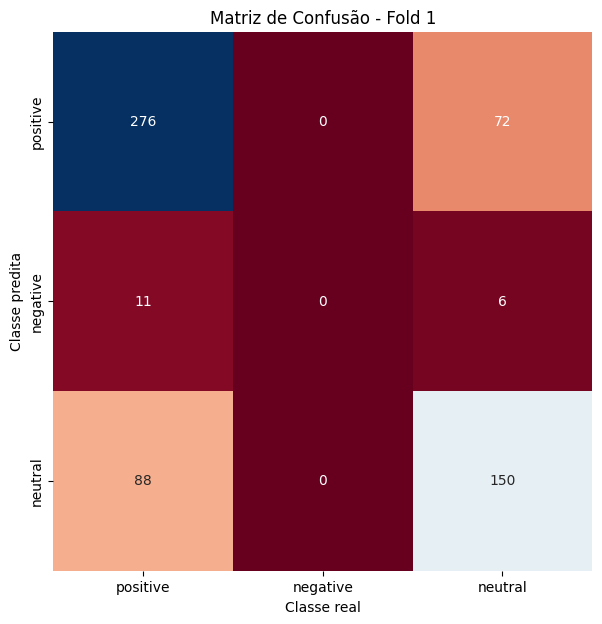


Fold 2 - Accuracy: 0.7326
Fold 2 - Precision: 0.7410
Fold 2 - Recall: 0.7326
Fold 2 - F1-Score: 0.7232


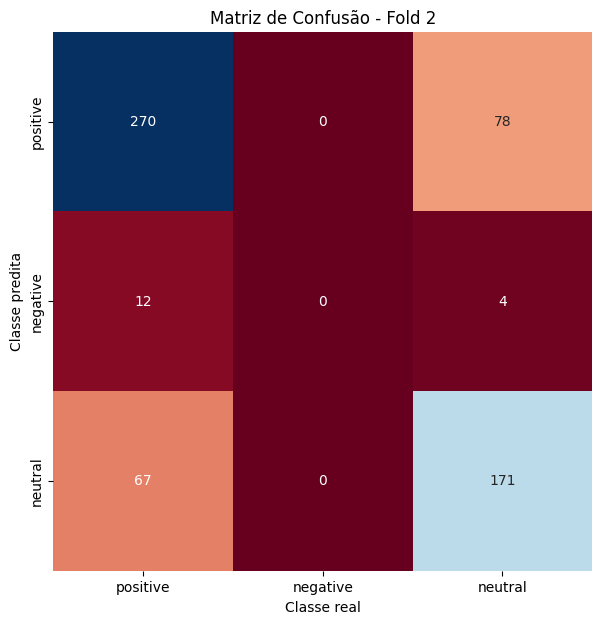


Fold 3 - Accuracy: 0.6993
Fold 3 - Precision: 0.6839
Fold 3 - Recall: 0.6993
Fold 3 - F1-Score: 0.7179


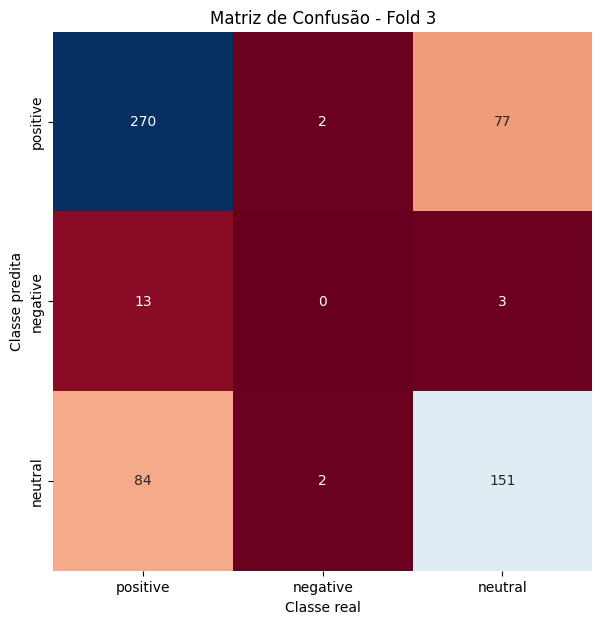


Fold 4 - Accuracy: 0.7060
Fold 4 - Precision: 0.6898
Fold 4 - Recall: 0.7060
Fold 4 - F1-Score: 0.7243


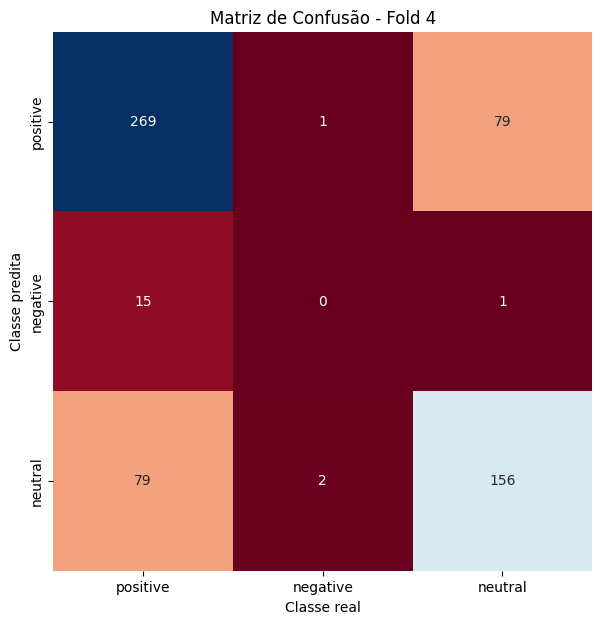


Fold 5 - Accuracy: 0.7326
Fold 5 - Precision: 0.7391
Fold 5 - Recall: 0.7326
Fold 5 - F1-Score: 0.7214


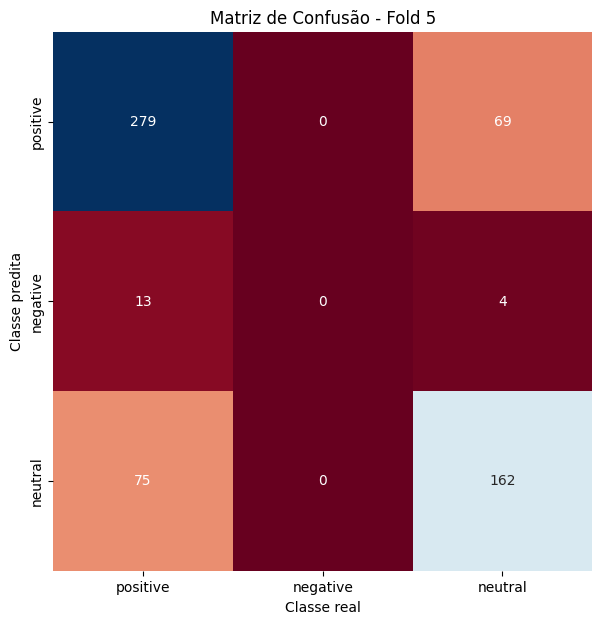


Média de Acurácia: 0.7154
Média de Precision: 0.7133
Média de Recall: 0.7154
Média de F1-Score: 0.7163




,accuracy_scores,precision_scores,recall_scores,f1_scores
0,0.706468,0.712615,0.706468,0.694713
1,0.732558,0.741010,0.732558,0.723237
2,0.699336,0.683853,0.699336,0.717854
3,0.705980,0.689844,0.705980,0.724320
4,0.732558,0.739094,0.732558,0.721383


In [78]:
BowNB_polarity  = cross_validate_model(textos_bow, categorias2, classifierNB, 5)
results_BowNB_polarity  = pd.DataFrame(BowNB_polarity)
print("\n")
results_BowNB_polarity

#TF-IDF + NB

Criaçao de uma instância do TfidfVectorizer que converte uma coleção de documentos em uma matriz TF-IDF.

TF-IDF (Term Frequency-Inverse Document Frequency): É uma técnica de vetorização de texto que avalia a importância de uma palavra em um documento com base na frequência da palavra e na frequência inversa de documentos em que a palavra aparece.


DataFrame Resultante: Cada linha do DataFrame representa um documento e cada coluna representa uma palavra (termo) do vocabulário. O valor em cada célula representa a importância do termo para o documento correspondente, com base na fórmula TF-IDF.


In [79]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer()
tfidf_vec = vectorizer_tfidf .fit_transform(train_lemmatizer['spacy_lemma'])
tfidf_dataframe=pd.DataFrame(tfidf_vec.toarray(),columns=vectorizer_tfidf .get_feature_names_out())
tfidf_dataframe


,aap,aba,abaixe,abaixem,abandonei,abate,abençoe,aberração,abertura,aberturar,...,época,ícone,íntegra,óculos,ódio,óptimo,órgão,ótimas,ótimo,ônibus
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Fold 1 - Accuracy: 0.4728
Fold 1 - Precision: 0.5675
Fold 1 - Recall: 0.4728
Fold 1 - F1-Score: 0.4213


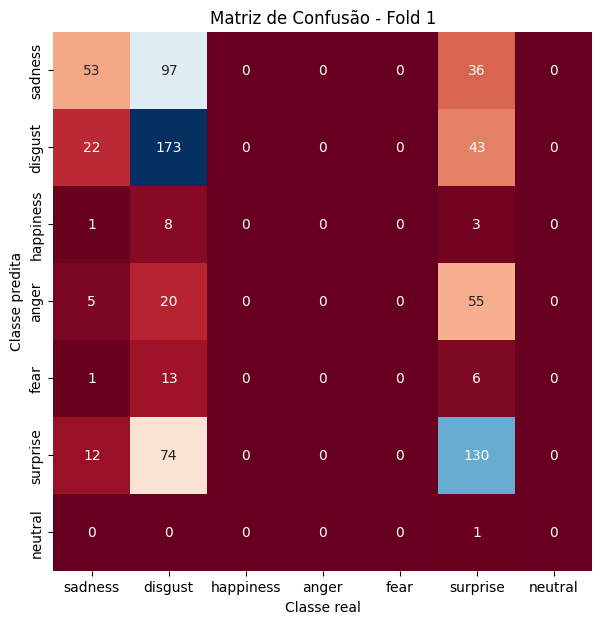


Fold 2 - Accuracy: 0.4369
Fold 2 - Precision: 0.5325
Fold 2 - Recall: 0.4369
Fold 2 - F1-Score: 0.3944


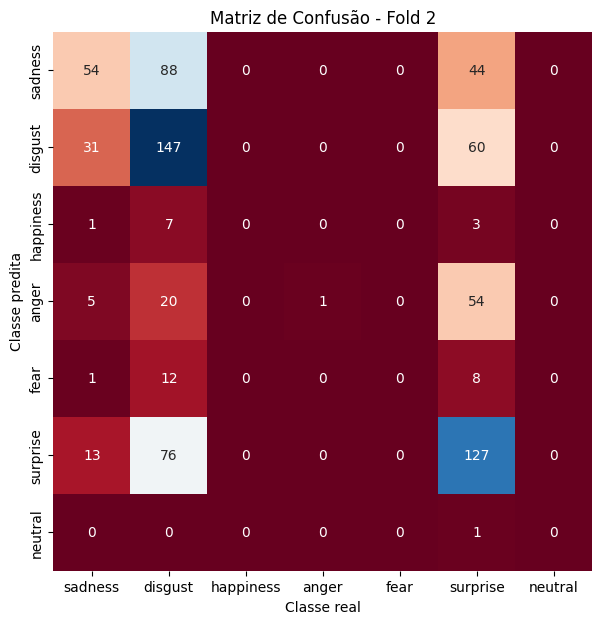


Fold 3 - Accuracy: 0.4861
Fold 3 - Precision: 0.5759
Fold 3 - Recall: 0.4861
Fold 3 - F1-Score: 0.4331


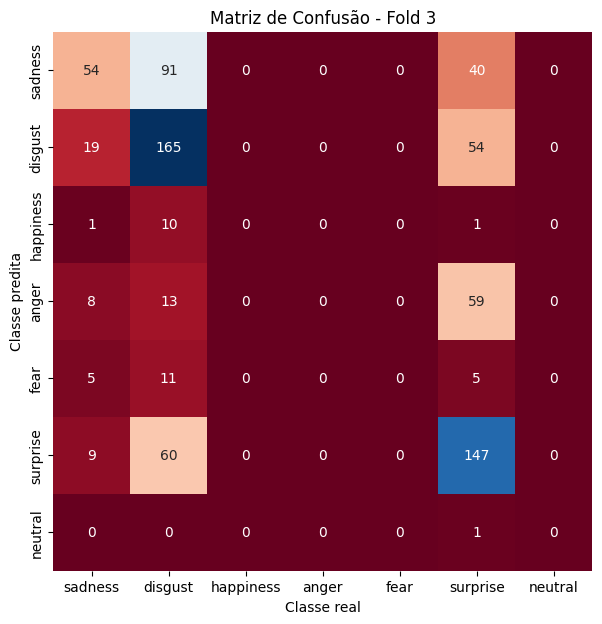


Fold 4 - Accuracy: 0.4561
Fold 4 - Precision: 0.5603
Fold 4 - Recall: 0.4561
Fold 4 - F1-Score: 0.4062


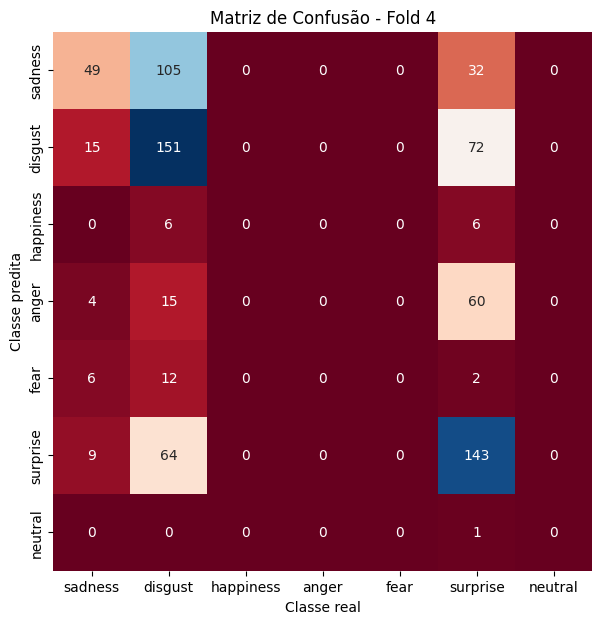


Média de Acurácia: 0.4630
Média de Precision: 0.5591
Média de Recall: 0.4630
Média de F1-Score: 0.4137




,accuracy_scores,precision_scores,recall_scores,f1_scores
0,0.472776,0.567463,0.472776,0.421257
1,0.436919,0.532511,0.436919,0.394361
2,0.486056,0.575948,0.486056,0.433064
3,0.456117,0.560321,0.456117,0.406250


In [80]:
textos_tfidf = tfidf_dataframe
TFIDFNB = cross_validate_model(textos_tfidf, categorias1, classifierNB, 4)
results_TFIDFNB  = pd.DataFrame(TFIDFNB)
print("\n")
results_TFIDFNB


Fold 1 - Accuracy: 0.7171
Fold 1 - Precision: 0.7280
Fold 1 - Recall: 0.7171
Fold 1 - F1-Score: 0.6962


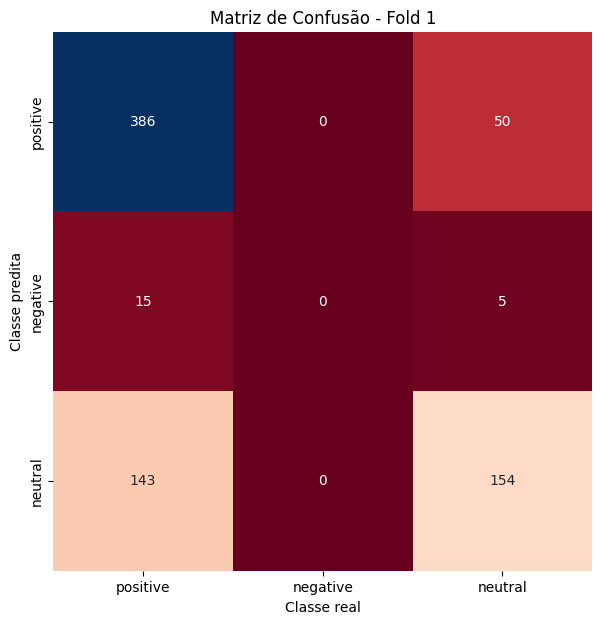


Fold 2 - Accuracy: 0.7171
Fold 2 - Precision: 0.7328
Fold 2 - Recall: 0.7171
Fold 2 - F1-Score: 0.6946


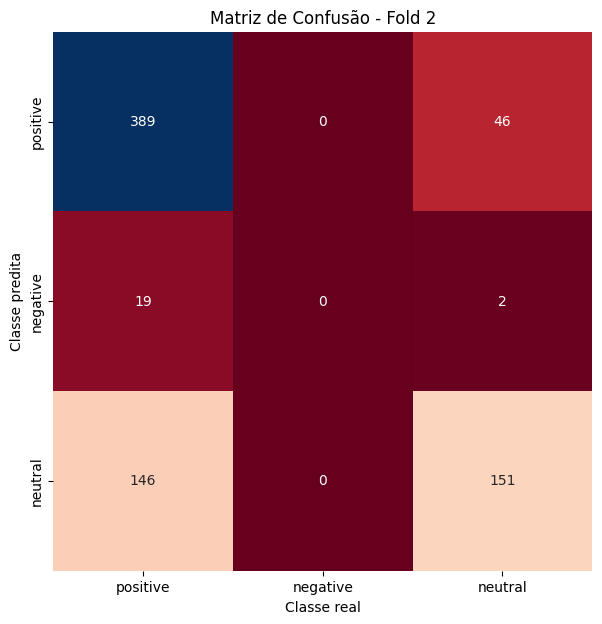


Fold 3 - Accuracy: 0.7105
Fold 3 - Precision: 0.7259
Fold 3 - Recall: 0.7105
Fold 3 - F1-Score: 0.6883


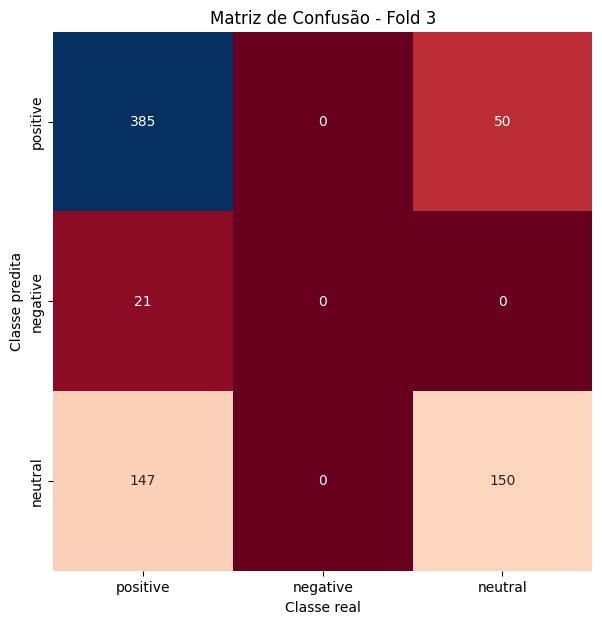


Fold 4 - Accuracy: 0.7354
Fold 4 - Precision: 0.7509
Fold 4 - Recall: 0.7354
Fold 4 - F1-Score: 0.7143


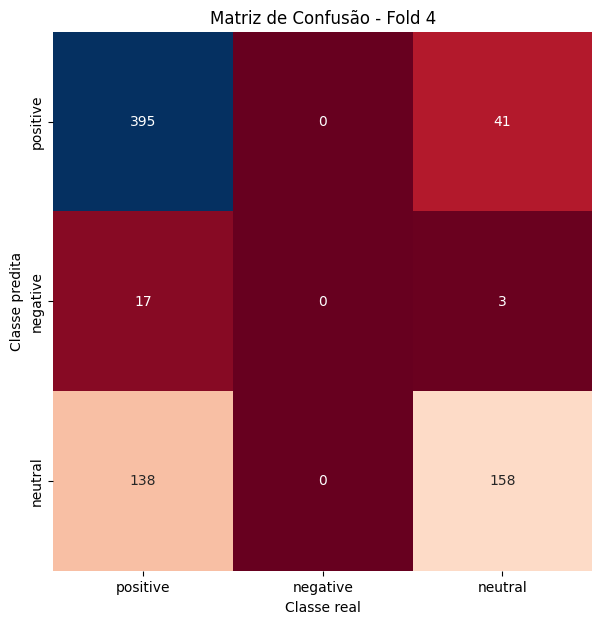


Média de Acurácia: 0.7200
Média de Precision: 0.7344
Média de Recall: 0.7200
Média de F1-Score: 0.6984




,accuracy_scores,precision_scores,recall_scores,f1_scores
0,0.717131,0.728034,0.717131,0.696207
1,0.717131,0.732807,0.717131,0.694593
2,0.710491,0.725894,0.710491,0.688305
3,0.735372,0.750867,0.735372,0.714300


In [81]:
TFIDFNB_polarity= cross_validate_model(textos_tfidf, categorias2, classifierNB, 4)
results_TFIDFNB_polarity = pd.DataFrame(TFIDFNB_polarity)
print("\n")
results_TFIDFNB_polarity

#BoW + KNN

Criação de uma instância do classificador KNN com 5 vizinhos (n_neighbors=5). O KNN é um algoritmo de aprendizado supervisionado usado para classificação e regressão, baseado na proximidade dos pontos de dados.


Fold 1 - Accuracy: 0.3254
Fold 1 - Precision: 0.4133
Fold 1 - Recall: 0.3254
Fold 1 - F1-Score: 0.3355


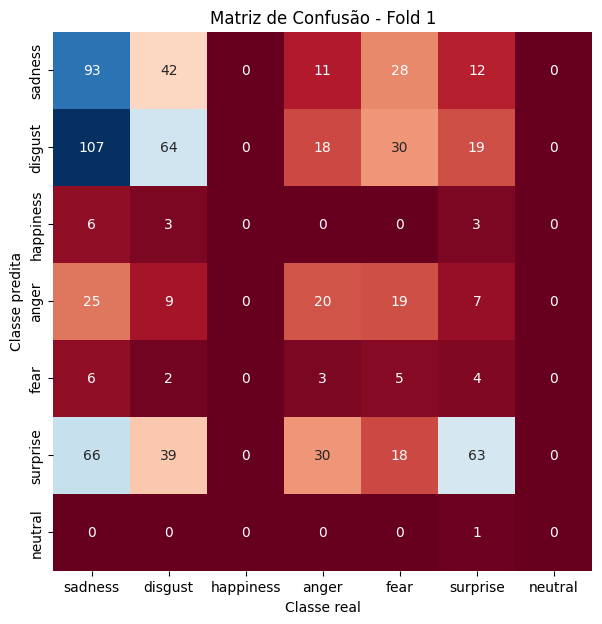


Fold 2 - Accuracy: 0.3174
Fold 2 - Precision: 0.3419
Fold 2 - Recall: 0.3174
Fold 2 - F1-Score: 0.3193


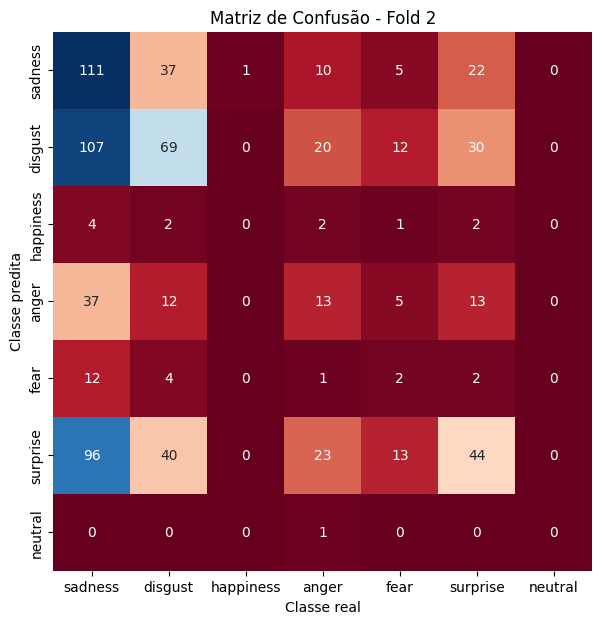


Fold 3 - Accuracy: 0.3293
Fold 3 - Precision: 0.3983
Fold 3 - Recall: 0.3293
Fold 3 - F1-Score: 0.3601


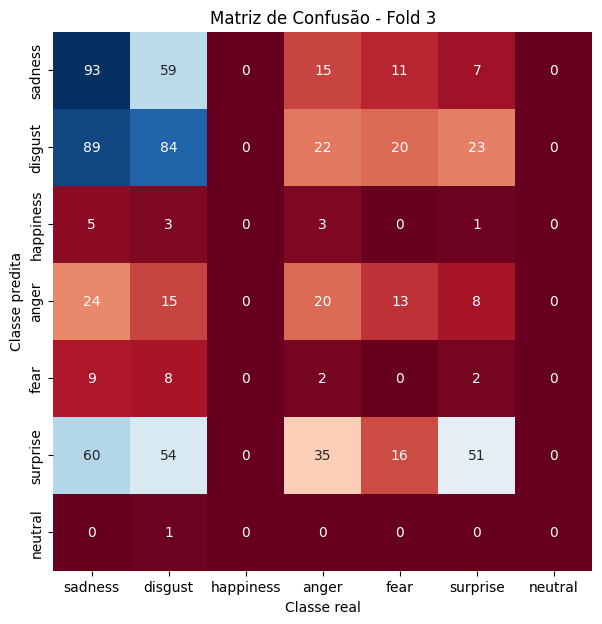


Fold 4 - Accuracy: 0.3324
Fold 4 - Precision: 0.3782
Fold 4 - Recall: 0.3324
Fold 4 - F1-Score: 0.3351


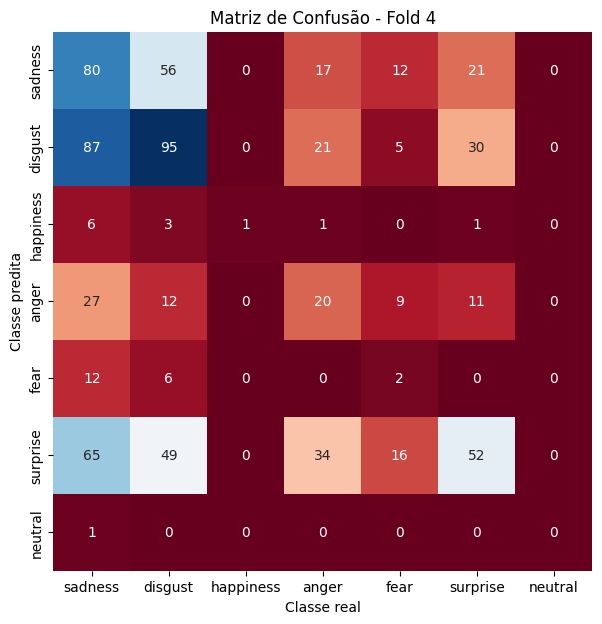


Média de Acurácia: 0.3261
Média de Precision: 0.3829
Média de Recall: 0.3261
Média de F1-Score: 0.3375




,accuracy_scores,precision_scores,recall_scores,f1_scores
0,0.325365,0.413339,0.325365,0.335518
1,0.317397,0.341911,0.317397,0.319304
2,0.329349,0.398314,0.329349,0.360102
3,0.332447,0.378193,0.332447,0.335095


In [82]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

classifierKnn = KNeighborsClassifier(n_neighbors=5)
BowKNN = cross_validate_model(textos_bow, categorias1, classifierKnn,4)
results_BowKNN = pd.DataFrame(BowKNN)
print("\n")
results_BowKNN



Fold 1 - Accuracy: 0.5976
Fold 1 - Precision: 0.5958
Fold 1 - Recall: 0.5976
Fold 1 - F1-Score: 0.5727


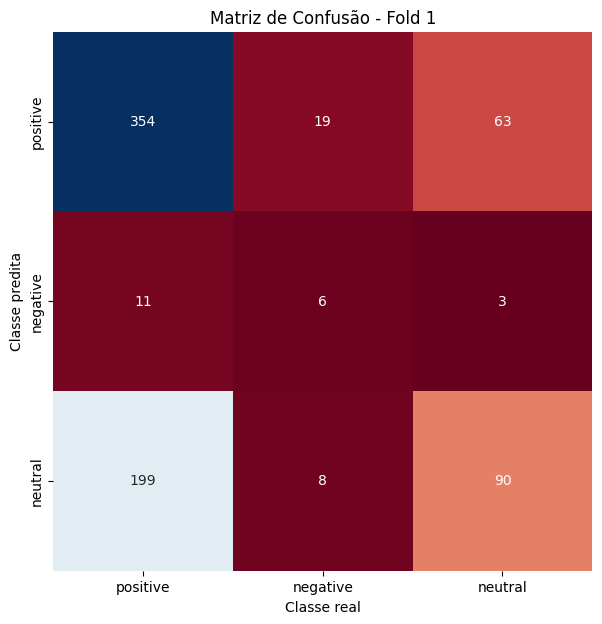


Fold 2 - Accuracy: 0.5830
Fold 2 - Precision: 0.6070
Fold 2 - Recall: 0.5830
Fold 2 - F1-Score: 0.5770


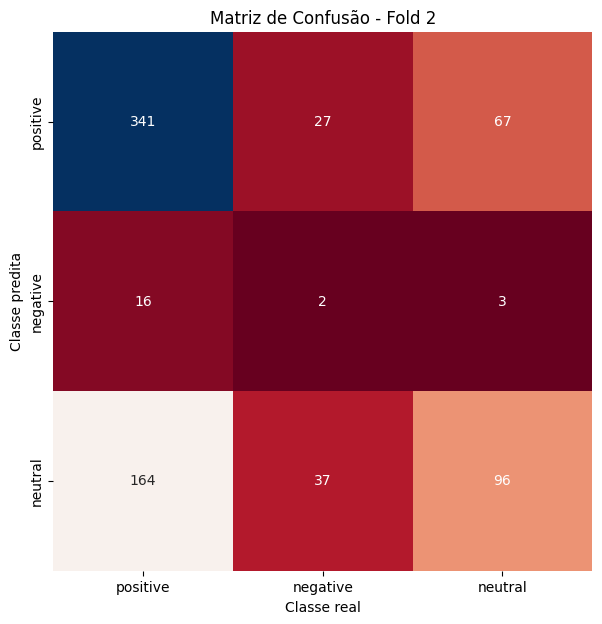


Fold 3 - Accuracy: 0.6295
Fold 3 - Precision: 0.6314
Fold 3 - Recall: 0.6295
Fold 3 - F1-Score: 0.6397


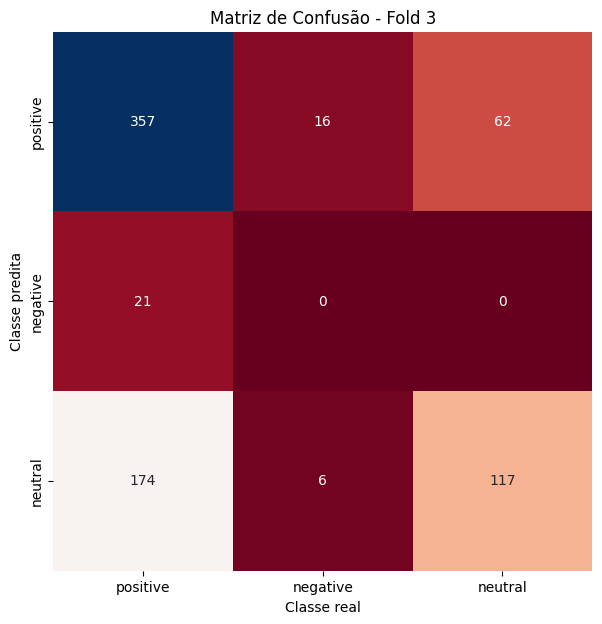


Fold 4 - Accuracy: 0.5665
Fold 4 - Precision: 0.5966
Fold 4 - Recall: 0.5665
Fold 4 - F1-Score: 0.5785


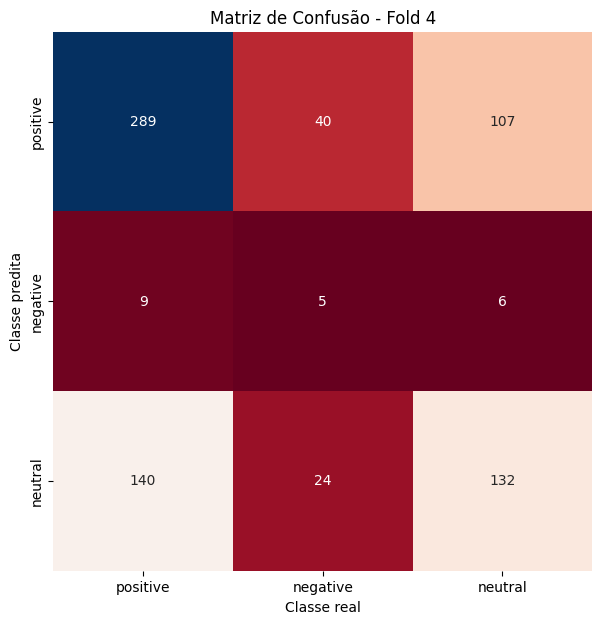


Média de Acurácia: 0.5941
Média de Precision: 0.6077
Média de Recall: 0.5941
Média de F1-Score: 0.5920




,accuracy_scores,precision_scores,recall_scores,f1_scores
0,0.597610,0.595806,0.597610,0.572682
1,0.583001,0.607048,0.583001,0.576961
2,0.629482,0.631421,0.629482,0.639688
3,0.566489,0.596552,0.566489,0.578497


In [83]:
BowKNN_polarity = cross_validate_model(textos_bow, categorias2, classifierKnn,4)
results_BowKNN_polarity= pd.DataFrame(BowKNN_polarity)
print("\n")
results_BowKNN_polarity

#TF-IDF + KNN


Fold 1 - Accuracy: 0.3347
Fold 1 - Precision: 0.3805
Fold 1 - Recall: 0.3347
Fold 1 - F1-Score: 0.2345


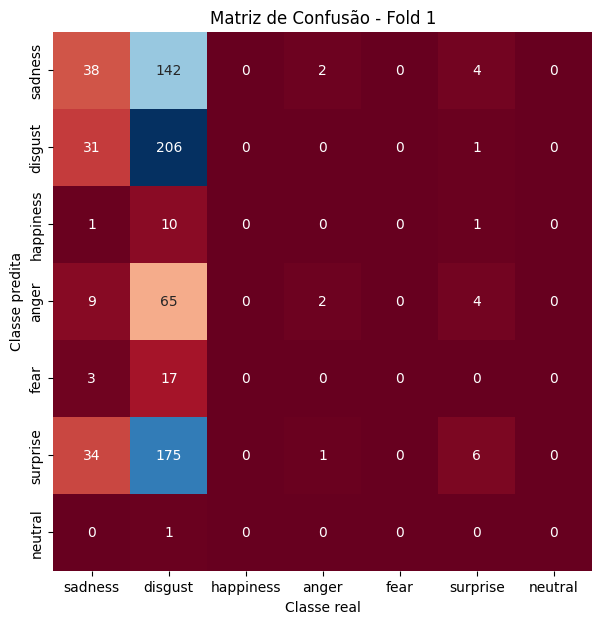


Fold 2 - Accuracy: 0.2669
Fold 2 - Precision: 0.4123
Fold 2 - Recall: 0.2669
Fold 2 - F1-Score: 0.1584


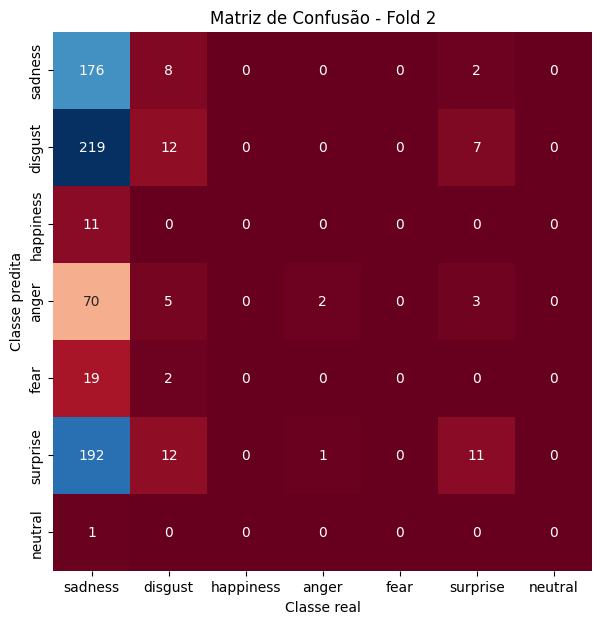


Fold 3 - Accuracy: 0.3347
Fold 3 - Precision: 0.3884
Fold 3 - Recall: 0.3347
Fold 3 - F1-Score: 0.2720


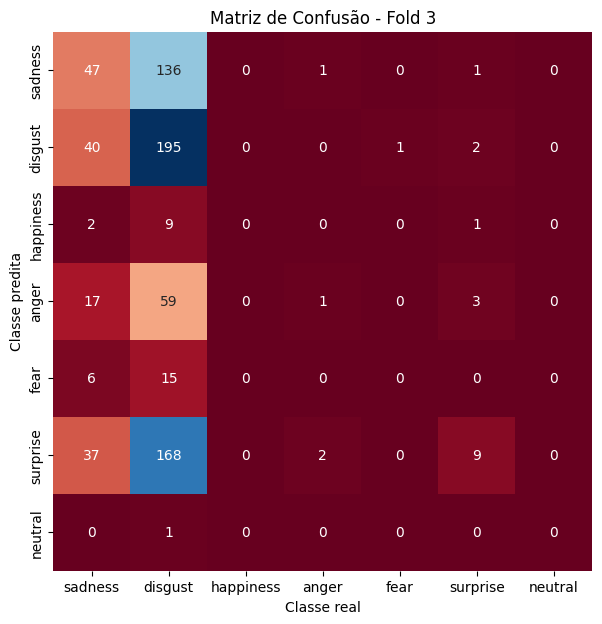


Fold 4 - Accuracy: 0.2580
Fold 4 - Precision: 0.3897
Fold 4 - Recall: 0.2580
Fold 4 - F1-Score: 0.1778


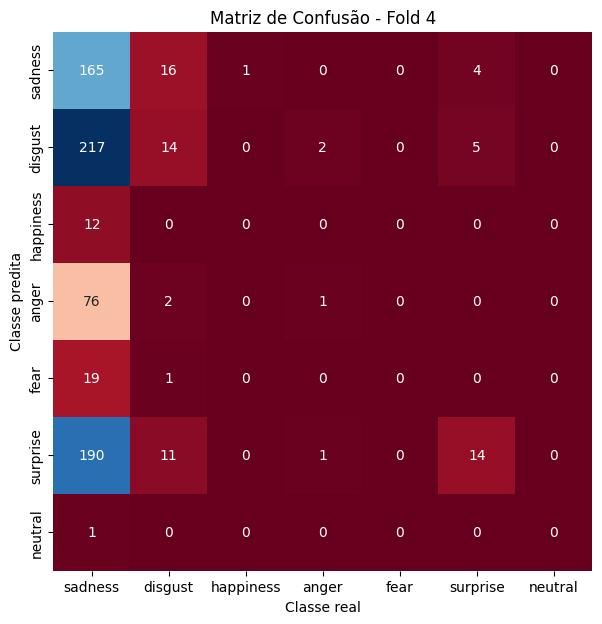


Média de Acurácia: 0.2986
Média de Precision: 0.3927
Média de Recall: 0.2986
Média de F1-Score: 0.2107




,accuracy_scores,precision_scores,recall_scores,f1_scores
0,0.334661,0.380507,0.334661,0.234482
1,0.266932,0.412284,0.266932,0.158393
2,0.334661,0.388395,0.334661,0.271961
3,0.257979,0.389745,0.257979,0.177816


In [84]:
TFIDFKNN = cross_validate_model(textos_tfidf, categorias1, classifierKnn,4)
results_TFIDFKNN= pd.DataFrame(TFIDFKNN)
print("\n")
results_TFIDFKNN


Fold 1 - Accuracy: 0.5896
Fold 1 - Precision: 0.6295
Fold 1 - Recall: 0.5896
Fold 1 - F1-Score: 0.4648


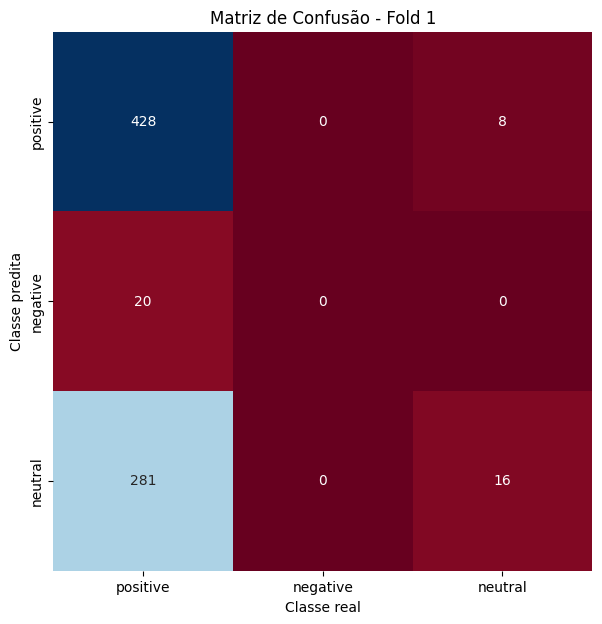


Fold 2 - Accuracy: 0.5883
Fold 2 - Precision: 0.6350
Fold 2 - Recall: 0.5883
Fold 2 - F1-Score: 0.4612


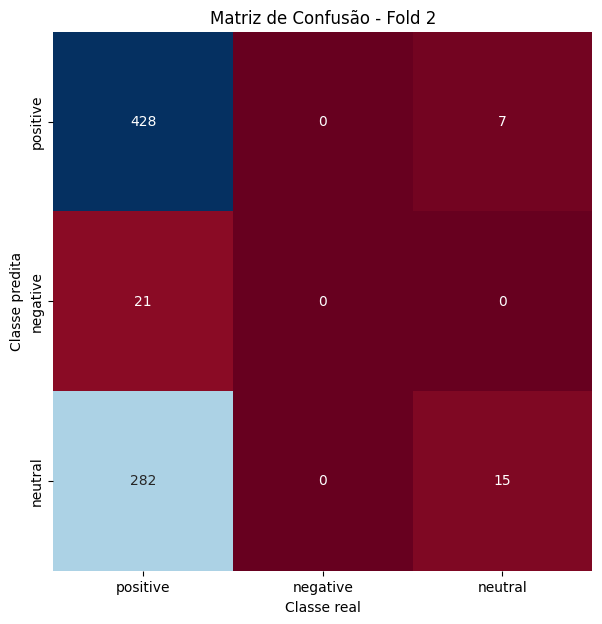


Fold 3 - Accuracy: 0.5857
Fold 3 - Precision: 0.6002
Fold 3 - Recall: 0.5857
Fold 3 - F1-Score: 0.4673


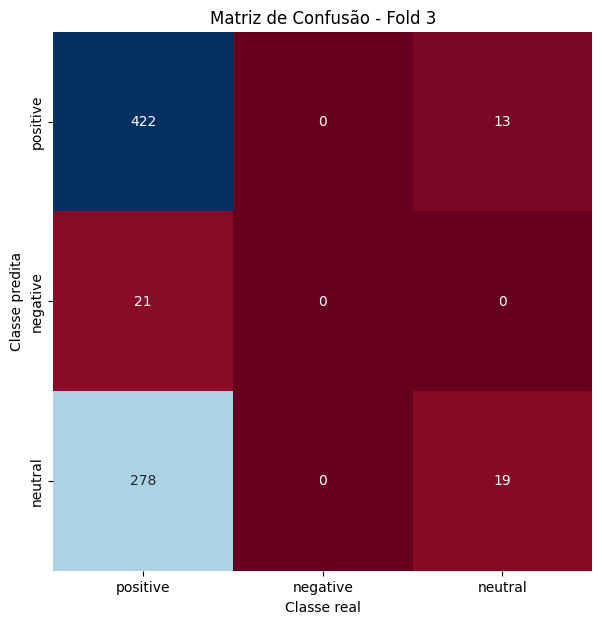


Fold 4 - Accuracy: 0.5838
Fold 4 - Precision: 0.5860
Fold 4 - Recall: 0.5838
Fold 4 - F1-Score: 0.4581


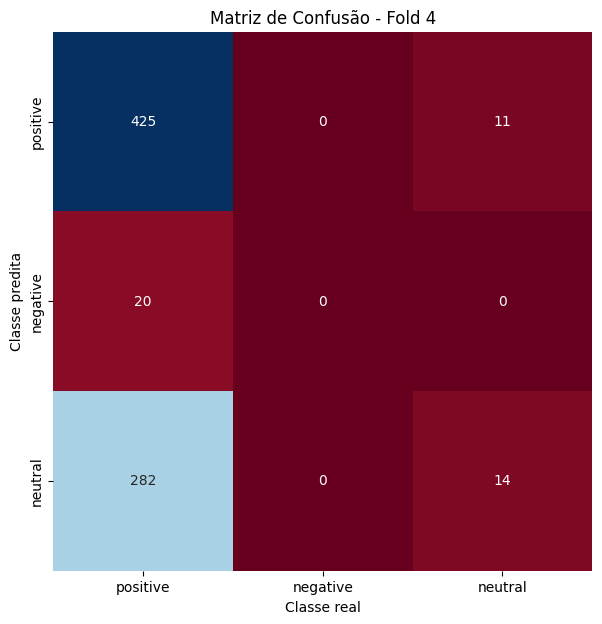


Média de Acurácia: 0.5868
Média de Precision: 0.6127
Média de Recall: 0.5868
Média de F1-Score: 0.4628




,accuracy_scores,precision_scores,recall_scores,f1_scores
0,0.589641,0.629453,0.589641,0.464760
1,0.588313,0.635049,0.588313,0.461194
2,0.585657,0.600197,0.585657,0.467329
3,0.583777,0.585962,0.583777,0.458082


In [85]:
TFIDFKNN_polarity = cross_validate_model(textos_tfidf, categorias2, classifierKnn,4)
results_TFIDFKNN_polarity= pd.DataFrame(TFIDFKNN_polarity)
print("\n")
results_TFIDFKNN_polarity

#Rede neural com embedding

#Word2Vec:

Word2Vec é uma técnica de aprendizado de representações vetoriais de palavras utilizando redes neurais. Ela é amplamente utilizada para criar embeddings de palavras que capturam suas relações semânticas.

Existem duas principais arquiteturas para Word2Vec:


*   Continuous Bag of Words (CBOW): Esta abordagem prevê uma palavra central com base no contexto das palavras vizinhas ao redor dela. Em outras palavras, CBOW usa palavras ao redor para prever a palavra-alvo.

*   Skip-gram: Contrariamente ao CBOW, o Skip-gram prevê palavras de contexto a partir de uma palavra central. Ou seja, dada uma palavra central, o Skip-gram tenta prever as palavras que aparecem ao seu redor.

Word2Vec é treinado em grandes corpora de texto e produz embeddings que são eficazes em capturar a semântica das palavras.

Este trecho de código cria um DataFrame a partir de train_lemmatizer, tokeniza o texto na coluna spacy_lemma, armazena esses tokens em uma nova coluna chamada tokens, e salva o DataFrame resultante em um arquivo CSV. Além disso, exibe as primeiras linhas do DataFrame para verificação.

In [86]:
train_neural = pd.DataFrame(train_lemmatizer)
train_neural['tokens'] = train_neural['spacy_lemma'].apply(lambda x: word_tokenize(x.lower()))
train_neural.to_csv('/content/drive/MyDrive/Colab Notebooks/word2vec.csv', index=False)
train_neural.head()

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5,spacy_lemma,tokens
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shopee razoável apesar fácil utilizar apre...,positive,sadness,NaN,app exemplo sugestão palavra pesquisa busca su...,"[app, exemplo, sugestão, palavra, pesquisa, bu..."
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimizado fácil visualizar produtos pe...,positive,sadness,NaN,produto acho recomendação produto produto brin...,"[produto, acho, recomendação, produto, produto..."
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prático fácil entender porém alguns ve...,positive,sadness,NaN,app prático vendedor produto anúncio diferença...,"[app, prático, vendedor, produto, anúncio, dif..."
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo bom algo chateou bastante fato pesq...,positive,sadness,NaN,fato produto cep frete frete produto valor car...,"[fato, produto, cep, frete, frete, produto, va..."
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tido dificuldades pagamento cart...,negative,disgust,NaN,app dificuldade pagamento crédito compra pagam...,"[app, dificuldade, pagamento, crédito, compra,..."


O código abaixo treina um modelo Word2Vec usando o algoritmo CBOW para gerar embeddings de palavras, salva os vetores em um formato de texto e o modelo completo em um arquivo binário para uso futuro.

In [87]:
from gensim.models import Word2Vec

# Treinar o modelo Word2Vec
model = Word2Vec(sentences=train_neural['tokens'],
                  sg=0,                   # Usar CBOW;
                  vector_size=300,        # Dimensionalidade dos embeddings
                  window=5,               # Tamanho da janela de contexto
                  min_count=5,            # Ignorar palavras com menos de 5 ocorrências
                  alpha=0.025,            # Taxa de aprendizado inicial
                  min_alpha=0.007)        # Taxa de aprendizado final

# Construir o vocabulário e treinar o modelo
model.build_vocab(train_neural['tokens'], update=True)
model.train(train_neural['tokens'],
            start_alpha=0.025,
            end_alpha=0.007,
            total_examples=model.corpus_count,
            epochs=20)

# Salvar o modelo e os embeddings
model.wv.save_word2vec_format('/content/drive/MyDrive/Colab Notebooks/model_word2vec.txt', binary=False)
model.save("/content/drive/MyDrive/Colab Notebooks/word2vec.model")

Este código calcula o embedding (representações vetoriais de palavras) médio de palavras para cada conjunto de tokens usando um modelo Word2Vec. Em seguida, adiciona esses embeddings como uma nova coluna no DataFrame e salva o DataFrame em um arquivo CSV. Por fim, imprime o embedding da primeira linha para verificação.

In [88]:
import numpy as np

tokens = train_neural['tokens']

def get_embedding_w2v(tokens, model_w2v):
    # Acessar o vocabulário do modelo
    valid_words = [word for word in tokens if word in model_w2v.key_to_index]
    if valid_words:
        return np.mean([model_w2v[word] for word in valid_words], axis=0)
    else:
        return np.zeros(model_w2v.vector_size)  # Ajuste para o tamanho do vetor do modelo

train_neural['embedding'] = train_neural['tokens'].apply(lambda x: get_embedding_w2v(x, model.wv))
train_neural.to_csv('/content/drive/MyDrive/Colab Notebooks/train_neural.csv', index=False)
print(train_neural.loc[0, 'embedding'])

[ 0.04352819  0.02000815  0.06548234  0.01889062 -0.17859302 -0.21780199
  0.07002736  0.3516619   0.01114071 -0.14192675  0.0422396  -0.03464437
  0.00273286 -0.07598314 -0.11397359 -0.04980202  0.03468787 -0.05822616
  0.0461799   0.00238372 -0.16565013 -0.09185968  0.0037819   0.15241271
  0.03852872 -0.15184878 -0.10301046 -0.01617276 -0.02009947 -0.15955389
  0.16546114 -0.03197894  0.06268929  0.06271209 -0.1200984   0.19067605
  0.1394673  -0.20719928  0.00282883 -0.14561148 -0.14613134 -0.04057861
  0.09970816 -0.18053152  0.17369603 -0.02774752  0.05936771  0.06317557
 -0.06299894  0.02845122  0.13068475  0.1685826   0.12667315 -0.02942563
  0.11243667  0.06860434  0.14742911  0.00769039  0.04763652  0.04057519
 -0.10415194 -0.03587279 -0.0906196   0.02112797  0.07159417  0.14036316
 -0.13865742 -0.07540637 -0.0437426  -0.06730068  0.07784978 -0.06397589
  0.13103221 -0.12806591 -0.03001615  0.01145534 -0.10123022  0.12257044
  0.04426152  0.16733602 -0.06378841 -0.14920296  0

O código abaixo define uma função cross_validate_model que realiza a validação cruzada para um classificador, calcula métricas de desempenho e exibe a matriz de confusão.

In [89]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_fscore_support

def cross_validate_model(X, y,classifier, n_splits):

  estratificada = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

  y_pred = cross_val_predict(classifier, X, y, cv=estratificada, method='predict')
  precision_scores, recall_scores, fscore_scores, _ = precision_recall_fscore_support(y, y_pred, average='macro', zero_division=1)
  accuracy_scores = accuracy_score(y, y_pred)



  #matriz de confusão
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize=(10, 7))
  sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False,
              xticklabels=y.unique(), yticklabels=y.unique())
  plt.xlabel("Classe real")
  plt.ylabel("Classe predita")
  plt.title(f'Matriz de Confusão')
  plt.show()

  return {
        'accuracy_scores': accuracy_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'f1_scores': fscore_scores
    }


# Word2Vec + KNN

Cria uma matriz 2D de embeddings a partir da coluna 'embedding' do DataFrame train_neural.
O método np.vstack empilha verticalmente todas as matrizes de embeddings para formar a matriz de características.


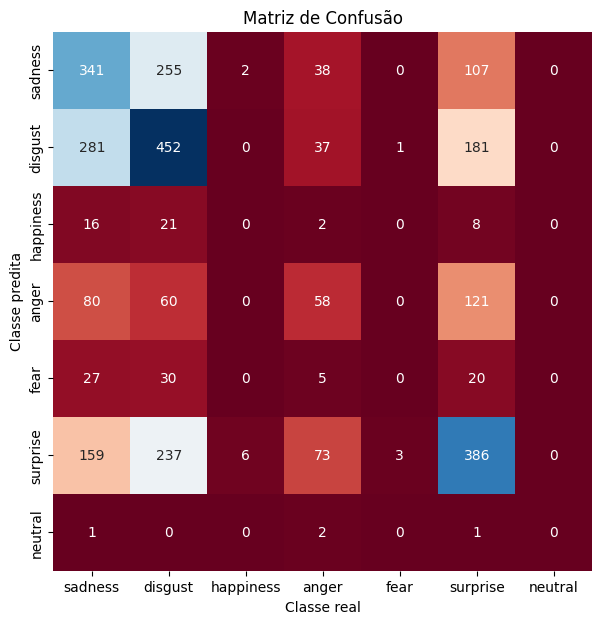

,accuracy_scores,precision_scores,recall_scores,f1_scores
0,0.410827,0.363349,0.223188,0.505548


In [90]:
X = np.vstack(train_neural['embedding'].values) #
y = train_neural['sentiment']

resultados = cross_validate_model(X, y, classifierKnn, 4)
results_word2vec = pd.DataFrame([resultados])
print("\n")
results_word2vec




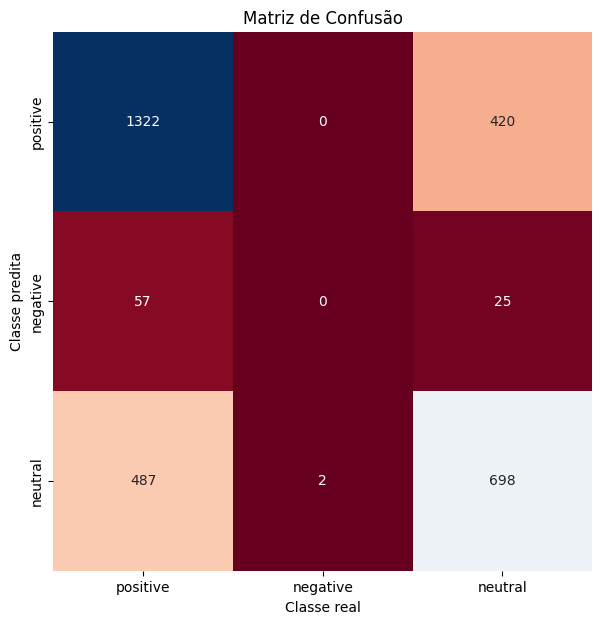

,accuracy_scores,precision_scores,recall_scores,f1_scores
0,0.670873,0.439714,0.448978,0.777319


In [91]:

X = np.vstack(train_neural['embedding'].values)
y = train_neural['sentiment_polarity']

resultados_polarity = cross_validate_model(X, y, classifierKnn, 4)
print("\n")
results_word2vec_polarity = pd.DataFrame([resultados_polarity])
print("\n")
results_word2vec_polarity


#Word2Vec + NB

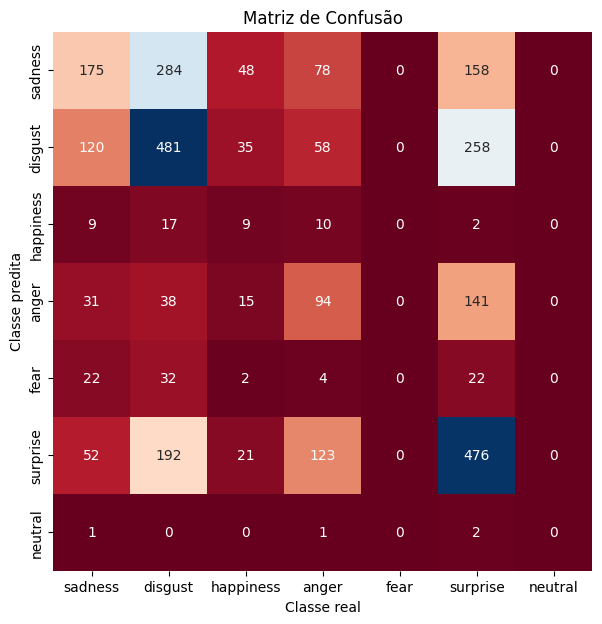

,accuracy_scores,precision_scores,recall_scores,f1_scores
0,0.410163,0.5231,0.253981,0.236561


In [92]:
from sklearn.preprocessing import MinMaxScaler

X = np.vstack(train_neural['embedding'].values)
y = train_neural['sentiment']

# Scale the embeddings to the range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

resultadosNB = cross_validate_model(X_scaled, y, classifierNB, 4)
print("\n")
results_word2vecNB = pd.DataFrame([resultadosNB])
results_word2vecNB



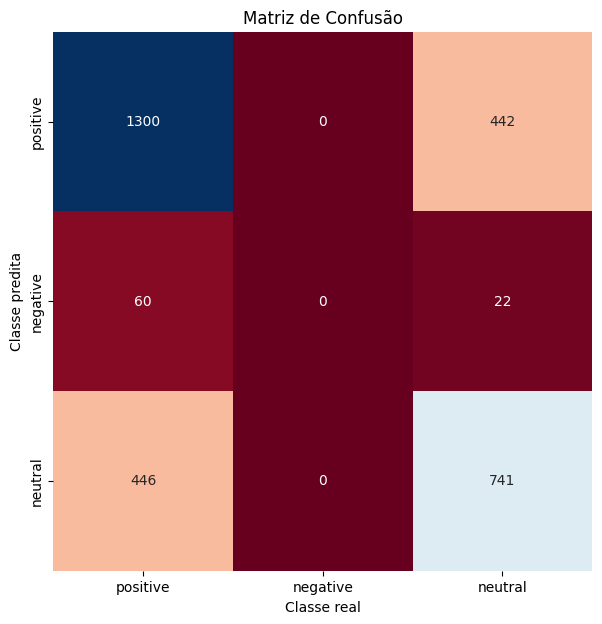

,accuracy_scores,precision_scores,recall_scores,f1_scores
0,0.677848,0.778254,0.456844,0.450791


In [93]:
from sklearn.preprocessing import MinMaxScaler

X = np.vstack(train_neural['embedding'].values)
y = train_neural['sentiment_polarity']

# Scale the embeddings to the range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

resultados_polarityNB = cross_validate_model(X_scaled, y, classifierNB, 4)
print("\n")
results_polarityNB = pd.DataFrame([resultados_polarityNB])
results_polarityNB


#BERTimbau


In [128]:
!pip install transformers datasets

import pandas as pd
import numpy as np
import os
import torch
from transformers import BertTokenizer, BertModel, Trainer, TrainingArguments, BertForSequenceClassification
from datasets import load_dataset, Dataset

train_lemmatizer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lemmatizer.csv')
train_bertimbau = pd.DataFrame(train_lemmatizer)
train_bertimbau.to_csv('/content/drive/MyDrive/Colab Notebooks/bertimbau.csv', index=False)
train_bertimbau.head()


,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5,spacy_lemma
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shopee razoável apesar fácil utilizar apre...,positive,sadness,NaN,"['app', 'exemplo', 'sugestão', 'palavra', 'pes..."
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimizado fácil visualizar produtos pe...,positive,sadness,NaN,"['produto', 'acho', 'recomendação', 'produto',..."
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prático fácil entender porém alguns ve...,positive,sadness,NaN,"['app', 'prático', 'vendedor', 'produto', 'anú..."
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo bom algo chateou bastante fato pesq...,positive,sadness,NaN,"['fato', 'produto', 'cep', 'frete', 'frete', '..."
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tido dificuldades pagamento cart...,negative,disgust,NaN,"['app', 'dificuldade', 'pagamento', 'crédito',..."


Este código realiza a transformação das colunas sentiment e sentiment_polarity do DataFrame train_bertimbau em valores numéricos usando a classe LabelEncoder. Cada categoria única em cada coluna é mapeada para um número inteiro. Isso é útil para preparar os dados para algoritmos de aprendizado de máquina que requerem entradas numéricas.

In [129]:
from sklearn.preprocessing import LabelEncoder
label_encoder_sentiment = LabelEncoder()
train_bertimbau['sentiment'] = label_encoder_sentiment.fit_transform(train_bertimbau['sentiment'])
train_bertimbau['sentiment_polarity'] = label_encoder_sentiment.fit_transform(train_bertimbau['sentiment_polarity'])
train_bertimbau

,reviewId,app_name,content,sentiment_polarity,sentiment,Unnamed: 5,spacy_lemma
0,01e23c15-44bf-46b7-b280-40e880d9d49b,Shopee,app shopee razoável apesar fácil utilizar apre...,2,5,NaN,"['app', 'exemplo', 'sugestão', 'palavra', 'pes..."
1,df40ba7c-075d-48dc-b798-21466dfb41d6,Shopee,app bem otimizado fácil visualizar produtos pe...,2,5,NaN,"['produto', 'acho', 'recomendação', 'produto',..."
2,59490b23-b17b-4bba-855b-b5053dadc0db,Shopee,app bom prático fácil entender porém alguns ve...,2,5,NaN,"['app', 'prático', 'vendedor', 'produto', 'anú..."
3,48fd8168-1e42-4475-9a99-935c2fd48769,Shopee,aplicativo bom algo chateou bastante fato pesq...,2,5,NaN,"['fato', 'produto', 'cep', 'frete', 'frete', '..."
4,f4e1468b-6d97-4f1a-927d-1afee2bfbe75,Shopee,app bom porém tido dificuldades pagamento cart...,0,1,NaN,"['app', 'dificuldade', 'pagamento', 'crédito',..."
...,...,...,...,...,...,...,...
3006,0d6b3412-9b1a-4969-9e60-0b2753a7eb16,gov.br,funciona reconhimento facial diz nenhum rosto ...,0,1,NaN,"['reconhimento', 'rosto', 'app', 'pessoa', 'je..."
3007,e3e70dcc-0199-4c29-86c4-0b2938e0d8b7,gov.br,experiência app sendo boa precisa aprimorament...,0,1,NaN,"['experiência', 'aprimoramento', 'login', 'rec..."
3008,5fb22c33-c93c-43fe-97a5-802183648acb,gov.br,consigo logar jeito nenhum código validação ch...,0,1,NaN,"['ce onsigo', 'jeito', 'código', 'site', 'port..."
3009,4772c4b6-5f0d-493f-b894-79b6e2abec32,gov.br,funcionava ultima atualização algum motivo app...,0,1,NaN,"['atualização', 'motivo', 'app', 'biometria', ..."


O código divide o DataFrame train_bertimbau em conjuntos de treino e teste, renomeia as colunas para facilitar o uso com modelos de aprendizado de máquina, e converte os DataFrames resultantes em objetos Dataset do Hugging Face para processamento posterior. Isso é útil para preparar os dados antes de treinar ou avaliar modelos de aprendizado de máquina usando a biblioteca transformers e datasets.

In [130]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(train_bertimbau, test_size=0.2, random_state=42)
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)
train_dataset

Dataset({
    features: ['reviewId', 'app_name', 'content', 'sentiment_polarity', 'sentiment', 'Unnamed: 5', 'spacy_lemma', '__index_level_0__'],
    num_rows: 2408
})

O Git lfs permite substituir arquivos grandes no repositório por pequenos arquivos de ponteiro.

In [118]:
#!apt-get install git-lfs
#!git lfs install
#!git lfs pull
#!git clone https://huggingface.co/neuralmind/bert-base-portuguese-cased "/content/drive/MyDrive/Colab Notebooks/bert"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Git LFS initialized.
Not in a git repository.
fatal: destination path '/content/drive/MyDrive/Colab Notebooks/bert' already exists and is not an empty directory.


O código carrega um tokenizer e um modelo BERT ajustado para a tarefa de classificação de sequência a partir de um diretório especificado. O tokenizer é usado para preparar os dados de entrada para o modelo, enquanto o modelo está configurado para realizar a classificação com base no número de classes presentes no conjunto de dados.

In [131]:
from transformers import BertTokenizer, BertForSequenceClassification
path = '/content/drive/MyDrive/Colab Notebooks/bert'
tokenizer = BertTokenizer.from_pretrained(path)
model = BertForSequenceClassification.from_pretrained(path, num_labels=len(train_df['sentiment'].unique()))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/drive/MyDrive/Colab Notebooks/bert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


O código define uma função para tokenizar o texto dos datasets, aplica essa função aos datasets de treinamento e teste em batches, e finalmente formata os datasets para serem compatíveis com o PyTorch, garantindo que as colunas necessárias estejam incluídas. Isso prepara os dados para serem alimentados no modelo BERT para treinamento e avaliação.

In [132]:
# Tokenização
def tokenize_function(examples):
    return tokenizer(examples['spacy_lemma'], padding='max_length', truncation=True,max_length=128, return_token_type_ids=False)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

train_dataset = train_dataset.rename_column('sentiment', 'labels')
test_dataset = test_dataset.rename_column('sentiment', 'labels')
train_dataset = train_dataset.rename_column('sentiment_polarity', 'labels2')
test_dataset = test_dataset.rename_column('sentiment_polarity', 'labels2')
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels','labels2'])
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels','labels2'])

Map:   0%|          | 0/2408 [00:00<?, ? examples/s]

Map:   0%|          | 0/603 [00:00<?, ? examples/s]

O código remove a coluna desnecessária 'spacy_lemma' dos datasets e garante que os datasets estejam formatados corretamente para serem usados com PyTorch. Isso é feito para limpar os dados e garantir que apenas as colunas necessárias estejam presentes para o treinamento do modelo BERT.

In [133]:
train_dataset = train_dataset.remove_columns(['spacy_lemma'])
test_dataset = test_dataset.remove_columns(['spacy_lemma'])

train_dataset = train_dataset.with_format('torch')
test_dataset = test_dataset.with_format('torch')

O código configura e executa o treinamento de um modelo BERT usando a classe Trainer da biblioteca transformers. Ele define argumentos como taxa de aprendizado, tamanho do lote e número de épocas, e realiza o treinamento com base nesses parâmetros. Após o treinamento, o modelo e o tokenizer são salvos para uso futuro.

Resultados obtidos do treinamento:

Validation Loss: Observa-se uma diminuição contínua na perda de validação ao longo das épocas, passando de 1.330821 na primeira época para 1.232238 na terceira época. Isso sugere que o modelo está melhorando em termos de generalização, ou seja, está se tornando mais preciso ao prever dados não vistos (dados de validação).

Training Loss: A perda de treinamento é registrada apenas a partir da segunda época e permanece constante em 1.375300 nas épocas subsequentes. O fato de ela não mudar pode indicar que o modelo atingiu um ponto em que está tendo dificuldades em melhorar ainda mais seu ajuste aos dados de treinamento, ou que o log da perda de treinamento não foi atualizado corretamente.

In [134]:
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/Colab Notebooks/resultados",
    eval_strategy="epoch",
   learning_rate=2e-5,
   per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
   weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()

model.save_pretrained("/content/drive/MyDrive/Colab Notebooks/resultados")
tokenizer.save_pretrained("/content/drive/MyDrive/Colab Notebooks/resultados")

Epoch,Training Loss,Validation Loss
1,No log,1.330821
2,1.375300,1.291547
3,1.375300,1.232238


('/content/drive/MyDrive/Colab Notebooks/resultados/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/resultados/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/resultados/vocab.txt',
 '/content/drive/MyDrive/Colab Notebooks/resultados/added_tokens.json')

A função get_embeddings processa uma lista de textos em batches, converte cada texto em tensores apropriados usando o tokenizer, e passa esses tensores pelo modelo para gerar embeddings. Os embeddings resultantes são extraídos da última camada oculta do modelo e retornados como um array NumPy. Esta função é útil para gerar embeddings de texto para tarefas como análise de sentimentos, classificação de texto ou similar.

In [135]:
def get_embeddings(texts, tokenizer, model, batch_size=32, max_length=128):
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        batch_texts = [str(text) for text in batch_texts]
        inputs = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, max_length=max_length)
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings = outputs.hidden_states[-1][:, 0, :].numpy()
        all_embeddings.extend(embeddings)
    return np.array(all_embeddings)


O código carrega modelo e um tokenizer local, usa-os para gerar embeddings para uma lista de textos e extrai os rótulos associados a esses textos. Em seguida, imprime as formas das matrizes de embeddings e dos arrays de rótulos. Isso é útil para verificar se o processo de geração de embeddings foi realizado corretamente e se os dados estão formatados de acordo com o esperado.

In [136]:
model = BertModel.from_pretrained("/content/drive/MyDrive/Colab Notebooks/resultados", output_hidden_states=True)
tokenizer = BertTokenizer.from_pretrained("/content/drive/MyDrive/Colab Notebooks/resultados")


X_bert = get_embeddings(train_bertimbau['spacy_lemma'].tolist(), tokenizer, model)
y_sentiment = train_bertimbau['sentiment'].values
y_polarity = train_bertimbau['sentiment_polarity'].values

print("Embeddings shape:", X_bert.shape)
print("Labels shape:", y_sentiment.shape, y_polarity.shape)

Embeddings shape: (3011, 768)
Labels shape: (3011,) (3011,)


O código define uma função classification que realiza a validação cruzada estratificada para um classificador e calcula várias métricas de desempenho.

In [138]:
def classification(X, y, classifier, fold_number=4):
    skf = StratifiedKFold(n_splits=fold_number, shuffle=True, random_state=42)
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    fscore_scores = []
    classification_reports = []

    y_series = pd.Series(y)

    fold_number = 0
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted', zero_division=1)
        report = classification_report(y_test, y_pred, zero_division=1)

        # Armazenar os resultados
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        fscore_scores.append(fscore)
        classification_reports.append(report)

        # Exibir resultados para o fold atual
        print(f'\nFold {fold_number} - Accuracy: {accuracy:.4f}')
        print(f'Fold {fold_number} - Precision: {precision:.4f}')
        print(f'Fold {fold_number} - Recall: {recall:.4f}')
        print(f'Fold {fold_number} - F1-Score: {fscore:.4f}')

        fold_number += 1

        # Calcular e exibir a matriz de confusão para o fold atual
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, square=True, annot=True, fmt='d', cmap='RdBu', cbar=False,
                    xticklabels=y_series.unique(), yticklabels=y_series.unique())
        plt.xlabel("Classe real")
        plt.ylabel("Classe predita")
        plt.title(f'Matriz de Confusão - Fold {fold_number}')
        plt.show()

    return {
        'accuracy_scores': accuracy_scores,
        'precision_scores': precision_scores,
        'recall_scores': recall_scores,
        'fscore_scores': fscore_scores
    }

O código configura e executa a validação cruzada para dois classificadores (KNN e Naive Bayes Multinomial), escala os dados de entrada e avalia o desempenho do classificador Naive Bayes Multinomial nos dados. Os resultados são então apresentados em um DataFrame. É utilizado o Multinomial devido o Naive-Bayes conter valores negativos e gera erro na hora da classificação.

Sentiment Classification:

Fold 0 - Accuracy: 0.5830
Fold 0 - Precision: 0.5981
Fold 0 - Recall: 0.5830
Fold 0 - F1-Score: 0.5889


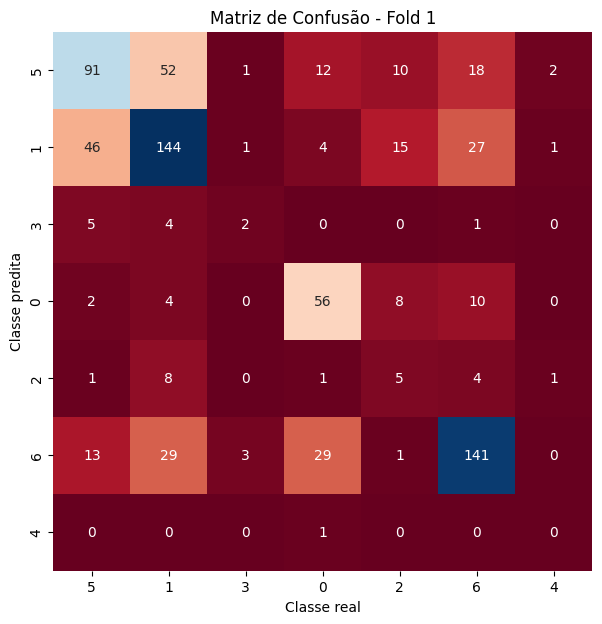


Fold 1 - Accuracy: 0.5936
Fold 1 - Precision: 0.5980
Fold 1 - Recall: 0.5936
Fold 1 - F1-Score: 0.6095


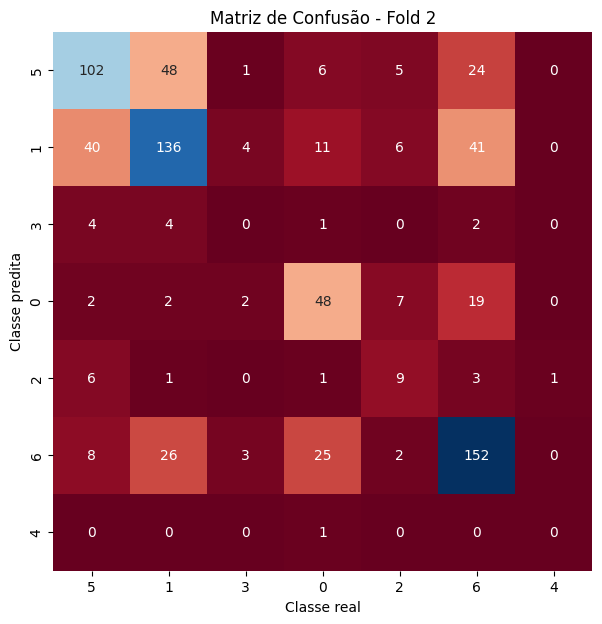


Fold 2 - Accuracy: 0.5989
Fold 2 - Precision: 0.6191
Fold 2 - Recall: 0.5989
Fold 2 - F1-Score: 0.6043


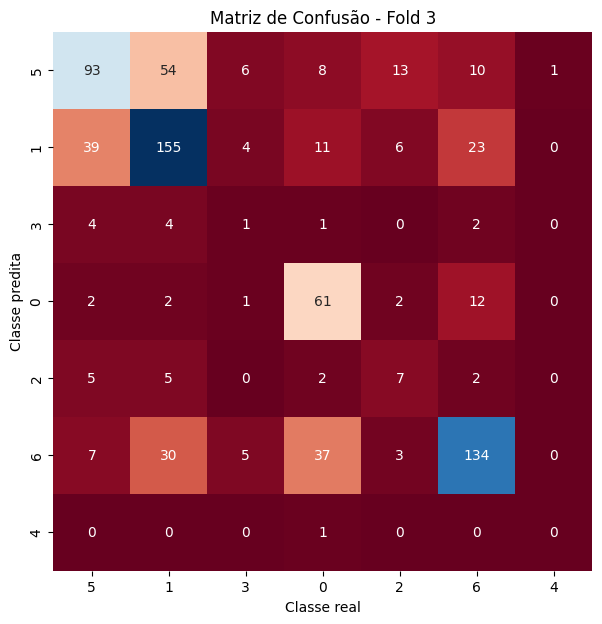


Fold 3 - Accuracy: 0.5997
Fold 3 - Precision: 0.6186
Fold 3 - Recall: 0.5997
Fold 3 - F1-Score: 0.6038


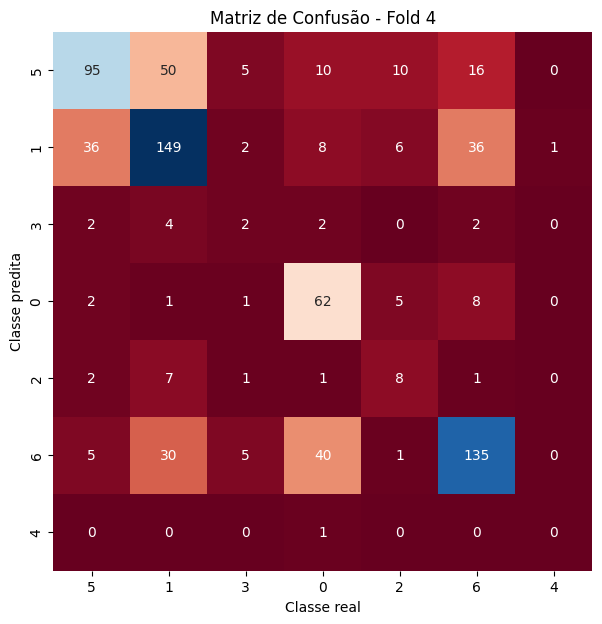

,accuracy_scores,precision_scores,recall_scores,fscore_scores
0,0.583001,0.598067,0.583001,0.588918
1,0.593625,0.598024,0.593625,0.609495
2,0.598938,0.619127,0.598938,0.604285
3,0.599734,0.618601,0.599734,0.603791


In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Sentiment Classification:")
estratificada = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
nb = MultinomialNB()

# Scale the embeddings to the range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_bert)


classifiers = [knn, nb]

results_sentiment = classification(X_scaled, y_sentiment, nb)


results_sentiment_bert = pd.DataFrame(results_sentiment)
print("\n")
results_sentiment_bert


Fold 0 - Accuracy: 0.7809
Fold 0 - Precision: 0.8031
Fold 0 - Recall: 0.7809
Fold 0 - F1-Score: 0.7888


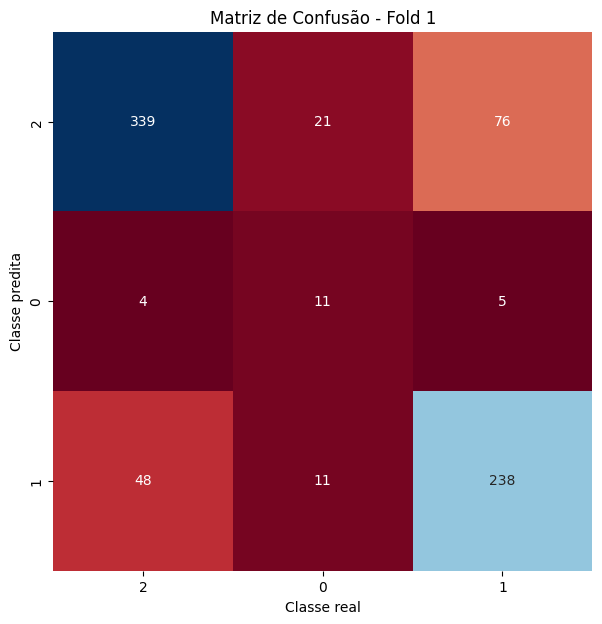


Fold 1 - Accuracy: 0.7875
Fold 1 - Precision: 0.8083
Fold 1 - Recall: 0.7875
Fold 1 - F1-Score: 0.7960


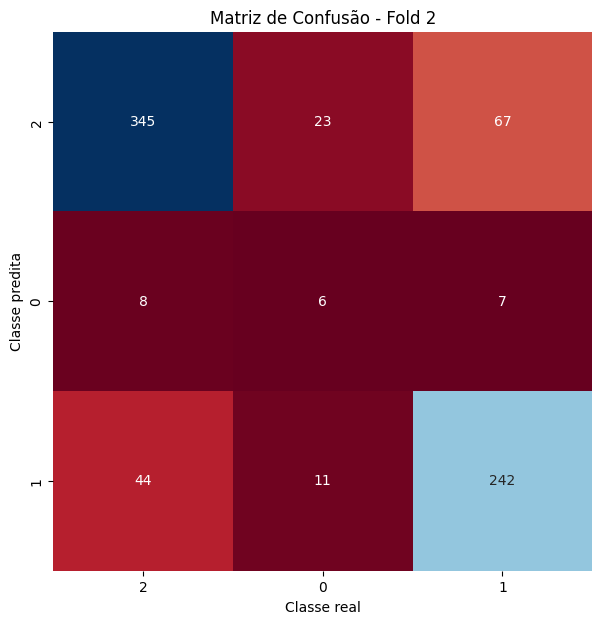


Fold 2 - Accuracy: 0.7769
Fold 2 - Precision: 0.7958
Fold 2 - Recall: 0.7769
Fold 2 - F1-Score: 0.7840


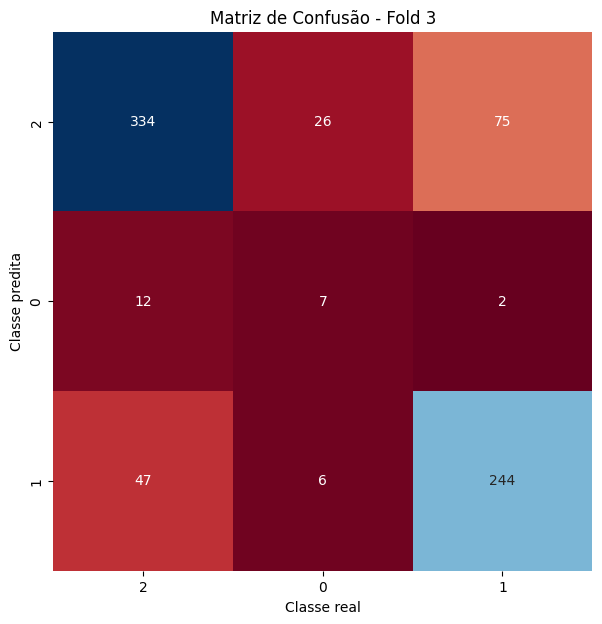


Fold 3 - Accuracy: 0.7859
Fold 3 - Precision: 0.8113
Fold 3 - Recall: 0.7859
Fold 3 - F1-Score: 0.7960


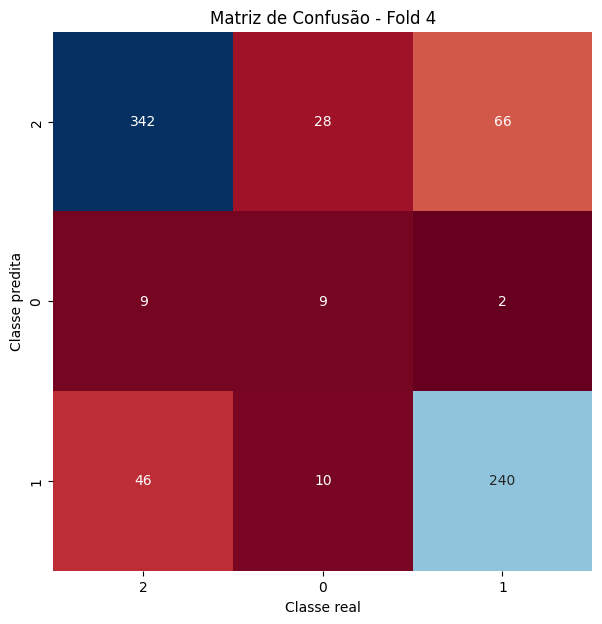

,accuracy_scores,precision_scores,recall_scores,fscore_scores
0,0.780876,0.803078,0.780876,0.788752
1,0.787517,0.808263,0.787517,0.795999
2,0.776892,0.795778,0.776892,0.784019
3,0.785904,0.811271,0.785904,0.796033


In [140]:

classifiers = [knn, nb]

results_polarity = classification(X_scaled, y_polarity, nb)


results_polarity_bert = pd.DataFrame(results_polarity)
print("\n")
results_polarity_bert

Abaixo contém código para apresentar, em forma de tabelas, todos os resultados obtidos em todos os modelos e folds.

In [142]:
from tabulate import tabulate

def format_dataframe(df, decimals=4):
    # Apply formatting to all numeric columns
    df = df.copy()
    for col in df.select_dtypes(include=[np.number]).columns:
        df[col] = df[col].apply(lambda x: f"{x:.{decimals}f}")
    return df

results_bownb = format_dataframe(results_bownb)
results_BowNB_polarity = format_dataframe(results_BowNB_polarity)
results_TFIDFNB = format_dataframe(results_TFIDFNB)
results_TFIDFNB_polarity = format_dataframe(results_TFIDFNB_polarity)
results_BowKNN = format_dataframe(results_BowKNN)
results_BowKNN_polarity = format_dataframe(results_BowKNN_polarity)
results_word2vec = format_dataframe(results_word2vec)
results_word2vec_polarity = format_dataframe(results_word2vec_polarity)
results_word2vecNB = format_dataframe(results_word2vecNB)
results_sentiment_bert = format_dataframe(results_sentiment_bert)
results_polarity_bert = format_dataframe(results_polarity_bert)

def print_table(df, title):
    print(f"\n{title}\n")
    print(tabulate(df, headers='keys', tablefmt='grid', showindex=False))

print_table(results_bownb, "Resultados - BOW + MultinomialNB")
print_table(results_BowNB_polarity, "Resultados - BOW + MultinomialNB (Polarity)")

print_table(results_TFIDFNB, "Resultados - TF-IDF + MultinomialNB")
print_table(results_TFIDFNB_polarity, "Resultados - TF-IDF + MultinomialNB (Polarity)")

print_table(results_BowKNN, "Resultados - BOW + KNN")
print_table(results_BowKNN_polarity, "Resultados - BOW + KNN (Polarity)")

print_table(results_word2vec, "Resultados - Word2Vec + KNN")
print_table(results_word2vec_polarity, "Resultados - Word2Vec + KNN (Polarity)")

print_table(results_word2vecNB, "Resultados - Word2Vec + NB")
print_table(results_polarityNB, "Resultados - Word2Vec + NB (Polarity)")

print_table(results_sentiment_bert, "Resultados - BERT + MultinomialNB")
print_table(results_polarity_bert, "Resultados - BERT + MultinomialNB (Polarity)")



Resultados - BOW + MultinomialNB

+-------------------+--------------------+-----------------+-------------+
|   accuracy_scores |   precision_scores |   recall_scores |   f1_scores |
+===================+====================+=================+=============+
|            0.502  |             0.5334 |          0.502  |      0.4816 |
+-------------------+--------------------+-----------------+-------------+
|            0.4754 |             0.5221 |          0.4754 |      0.4537 |
+-------------------+--------------------+-----------------+-------------+
|            0.4993 |             0.5165 |          0.4993 |      0.4768 |
+-------------------+--------------------+-----------------+-------------+
|            0.4681 |             0.5061 |          0.4681 |      0.4475 |
+-------------------+--------------------+-----------------+-------------+

Resultados - BOW + MultinomialNB (Polarity)

+-------------------+--------------------+-----------------+-------------+
|   accuracy_scores

#Predição de sentimento para comentários inexistentes


O código abaixo é realizado com o melhor classificador apresentado nas tabelas anteriores, no caso o Bertimbau + MultinomialNB, ele lê e pré-processa um conjunto de dados de comentários, tokeniza e gera embeddings usando um modelo pré-treinado do transformers. O resultado é uma matriz de embeddings (embeddings_test), onde cada linha representa a representação vetorial dos comentários após o processamento pelo modelo.

In [143]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel


tokenizer = AutoTokenizer.from_pretrained('/content/drive/MyDrive/Colab Notebooks/resultados')
model = AutoModel.from_pretrained('/content/drive/MyDrive/Colab Notebooks/resultados')


test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_comentarios.csv')

test['content'] = test['content'].apply(lambda x: regex.sub('[^\p{Latin}]', u' ', str(x)))
test['content'] = test['content'].apply(lambda x: x.lower())
test['content'] = test['content'].apply(remove_stopwords)
test['spacy_lemma'] = test['content'].apply(lemmatize_text)
test['spacy_lemma'] = test['spacy_lemma'].apply(lambda x: ' '.join(x))


inputs = tokenizer(test['spacy_lemma'].tolist(), return_tensors='pt', truncation=True, padding=True, max_length=128)

with torch.no_grad():
    outputs = model(**inputs)
    embeddings_test = outputs.last_hidden_state[:, 0, :].numpy()

embeddings_test

array([[-0.34056672, -0.4746972 ,  0.6806116 , ..., -0.39678374,
         0.62915844, -0.62315255],
       [-0.4127923 , -0.9210099 ,  0.6021869 , ..., -0.524844  ,
         0.63922703, -1.0358026 ],
       [-0.07332858, -0.42211965,  1.1760923 , ..., -0.08407491,
        -0.06217703, -0.25455558]], dtype=float32)

O fit que treina o classificador KNN usando os embeddings X_bert (executado anteriormente) e os rótulos de sentimento fornecidos no arquivo CSV já existente anteriormente.

In [144]:
knn = KNeighborsClassifier(n_neighbors=5)
train_bertimbau_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bertimbau.csv')

knn.fit(X_bert,train_bertimbau_test['sentiment'])
y_pred = knn.predict(embeddings_test)
y_pred= pd.DataFrame(y_pred, columns=['sentiment'])
y_pred


,sentiment
0,disgust
1,disgust
2,sadness


In [145]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_bert,train_bertimbau_test['sentiment_polarity'])
y_pred_polarity = knn.predict(embeddings_test)
y_pred_polarity= pd.DataFrame(y_pred_polarity, columns=['sentiment_polarity'])
y_pred_polarity


,sentiment_polarity
0,negative
1,negative
2,positive


Resultados reais e previstos, obteve-se uma resposta positiva considerando que o resultado real pode ser avaliado errado devido a proximidade de significado entre  anger e disgust.

In [146]:
predict_val = pd.DataFrame({'Sentimento Real':test['sentiment'], 'Polaridade Real':test['sentiment_polarity'], 'Sentimento Previsto':y_pred['sentiment'], 'Polaridade prevista':y_pred_polarity['sentiment_polarity']})
predict_val

,Sentimento Real,Polaridade Real,Sentimento Previsto,Polaridade prevista
0,anger,negative,disgust,negative
1,disgust,negative,disgust,negative
2,happiness,positive,sadness,positive
